# Instalar bibliotecas

In [1]:
# !pip install plotly --upgrade

In [2]:
# !pip install dataframe-image

# Importar bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
# from sklearn.preprocessing import MinMaxScaler as mms

In [2]:
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency

In [3]:
# import dataframe_image as dfi # https://predictivehacks.com/?all-tips=save-a-pandas-dataframe-as-an-image

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", 100)

# Carregar banco de dados

In [5]:
db = pd.read_csv("MICRODADOS_ENEM_2020_utf8.csv", sep=';')

# Visualizar os dados

In [107]:
db.shape

(5783109, 76)

In [108]:
db.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',

In [7]:
db.head(10)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,200006271946,2020,11,F,1,2,1,1,11,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1501402,Belem,15,PA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,200001195856,2020,11,M,2,3,1,1,11,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2408102,Natal,24,RN,1,1,1,1,702.0,689.0,693.0,698.0,604.1,661.7,595.3,711.3,BCBDBDCCCDBDDBADEEACEEAECBECCDBCACDEBEECEBAAE,BCAECABCDCEBDBBBDAABABACBCDDDBDDBABDAADACACBC,99999CADDEDADBAABEAADAAAADCADAABDCCBEECAEECAAC...,EBEBDEDAECBADCADDABACAEDBEEEAEADCCBCEACDACEBB,1,ABBACBCCCDDDDBAEEBECEDACABDCBEDAECDABECCBBADE,BCEECDBCCDEBDBBBBEAAAEACBCDDDBDDBABDABDDBAABC,99999CBDDEDBDBACECABAAAEAECCDCABCBBBBEEDCECAAE...,BBEADECAECBBXCEBADBACAEDACEDADAADCBCCBBDABBEE,1.0,120.0,120.0,120.0,120.0,100.0,580.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,200001943954,2020,4,F,2,3,2,2,0,2,1.0,0,2927408.0,Salvador,29.0,BA,2.0,1.0,1.0,2927408,Salvador,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,A,D,3.0,B,A,B,A,A,A,B,A,B,A,B,A,A,B,A,A,A,A,A,A
3,200001908998,2020,2,M,1,3,1,2,0,2,1.0,0,3547304.0,Santana de Parnaiba,35.0,SP,3.0,1.0,1.0,3547304,Santana de Parnaiba,35,SP,1,1,1,1,700.0,688.0,692.0,696.0,620.8,675.0,624.2,759.4,EBEDCCCDCBDBAECAECCECEACCBAABBBCEABCAAAEBEBAE,DABCCACCBCCDCADBDCBAAEBDDBAABDBAEBEBBABDABDBE,DCEAB99999AADAECCEBCDDDCBABDDABBCEEBAEDDDADEBE...,CBDBDCCDDEECBAABBBADEDEDBECDEBBADAEBAABBECBBA,0,BDECCACBEBDEAEDAECCBAEABCCEADDBBCADCBDDEBDBAC,DABCCAECBABECADBDCCABDBCDDAABDBAEBEBBDBDDBDBE,DCEAD99999AADACCCCBBDDCABAECAABBEECBAEDDBBEEBE...,EBDBXCCDAEECBAABABAEDDEDAECBCDCADEEBBABBACBCA,1.0,140.0,200.0,140.0,120.0,160.0,760.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,200001634757,2020,4,F,1,3,2,1,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3121605,Diamantina,31,MG,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,G,B,B,3.0,B,A,B,D,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
5,200003132410,2020,3,F,1,3,1,1,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4305207,Cerro Largo,43,RS,1,1,1,1,598.0,567.0,577.0,588.0,498.1,604.7,505.4,526.7,CABBEEACAEBEBCCDACBEDADDCCBECDCBDADDEBDBDACAB,ACEBBDDCADDAACEEAAEBDBDCCDACCDEDCDACADBBBECDD,99999CBECEBEDBEECEABBADCDDADCADAAECDEBAAADEBAD...,BADCAAAEEDBEDBACEDBACCDBABDECCDDCCAEAACEDACCB,1,CEDBDDDCACCBDAEBADCBDCDXAAECEDDDECDDCBDDAEDCC,DABCBDDDAEDBECECBBEDEBDEECBCCCBACDCCADEBDECDD,AAEDCACEEECEAACBAEBBEDACDBAADADDEBBEBAAADEACAA...,AEBCCXCCCACCDABCCABCABCBAECEDBBDBEEEDBBACCDAC,1.0,140.0,120.0,140.0,140.0,160.0,700.0,C,B,C,B,5.0,C,A,B,E,A,A,B,A,A,A,B,A,A,B,B,A,D,A,B,B
6,200001379770,2020,9,M,1,3,1,1,6,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2611606,Recife,26,PE,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,200001334237,2020,4,M,1,1,1,1,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3550

In [8]:
db.astype('object').describe() # https://www.statology.org/pandas-describe-categorical/

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
count,5783109,5783109,5783109,5783109,5783109,5783109,5783109,5783109,5783109,5783109,1303446.0,5783109,904569.0,904569,904569.0,904569,904569.0,904569.0,904569.0,5783109,5783109,5783109,5783109,5783109,5783109,5783109,5783109,2597440.0,2754140.0,2754140.0,2597440.0,2597440.0,2754140.0,2754140.0,2597440.0,2597440,2754140,2754140,2597440,5783109,2597440,2754140,2754140,2597440,2754140.0,2754140.0,2754140.0,2754140.0,2754140.0,2754140.0,2754140.0,5687143,5687143,5687143,5687143,5687143.0,5687143,5687143,5687143,5687143,5687143,5687143,5687143,5687143,5687143,5687143,5687143,5687143,5687143,5687143,5687143,5687143,5687143,5687143,5687143,5687143
unique,5783109,1,20,2,5,6,5,4,15,3,2.0,2,5534.0,5261,27.0,27,4.0,2.0,4.0,1747,1711,27,27,3,3,3,3,14.0,14.0,14.0,14.0,4779.0,4882.0,4578.0,6233.0,2595887,2746813,2751395,2594861,2,12,12,16,13,8.0,11.0,10.0,11.0,11.0,11.0,50.0,8,8,6,6,20.0,17,4,5,5,5,5,5,5,5,5,5,5,2,5,2,2,5,2,5,2
top,200006271946,2020,3,F,1,3,1,1,0,1,1.0,0,3550308.0,Sao Paulo,35.0,SP,2.0,1.0,1.0,3550308,Sao Paulo,35,SP,0,0,0,0,600.0,570.0,579.0,589.0,430.2,0.0,0.0,402.4,.............................................,.............................................,99999............................................,.............................................,1,DCDXDCCAEBADCBAAEACCBCEDDCBDDDAEDDCDECCEDBDDD,BDDBECECBACDBDEEBDEDDAECDDCCADECBCCCBBEDABCDE,AACDEEEECADBBCAAADBADEABEBAAADEBADADAEBDACAACB...,BAECDBBXCCCBDBACCDBEEEBCCAABCCACEACCEDBCABCDA,1.0,120.0,120.0,120.0,120.0,40.0,560.0,E,E,C,B,4.0,B,A,B,C,A,A,B,A,B,A,A,A,A,B,A,A,C,A,A,B
freq,1,5783109,887715,3468805,4851310,2720485,5624622,3794279,2524990,4387282,1294245.0,5225684,38277.0,38277,167183.0,167183,630939.0,873348.0,899455.0,250475,250475,910492,910492,3184243,3024590,3024590,3184243,632575.0,670868.0,670868.0,632575.0,1363.0,5067.0,2349.0,1029.0,705,5067,1247,913,3106103,634095,672453,672453,633735,2674914.0,1023568.0,1202895.0,931333.0,1087826.0,417034.0,170075.0,1444832,1796085,1350641,2582143,1735926.0,1884219,5323495,4171310,2919197,3409682,4439673,5391398,3607444,3185213,5100067,3092401,5565114,4684103,4046928,4430283,4645079,1814775,4710317,2844982,4634811


In [9]:
len(db)

5783109

In [10]:
db['CO_MUNICIPIO_ESC'].count()

904569

In [11]:
teste = db['CO_MUNICIPIO_ESC'].astype('object').describe()
teste

count      904569.0
unique       5534.0
top       3550308.0
freq        38277.0
Name: CO_MUNICIPIO_ESC, dtype: float64

In [12]:
db.describe()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,CO_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,CO_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
count,5.783109e+06,5783109.0,5.783109e+06,5.783109e+06,5.783109e+06,5.783109e+06,5.783109e+06,5.783109e+06,5.783109e+06,1.303446e+06,5.783109e+06,9.045690e+05,904569.000000,904569.000000,904569.000000,904569.000000,5.783109e+06,5.783109e+06,5.783109e+06,5.783109e+06,5.783109e+06,5.783109e+06,2.597440e+06,2.754140e+06,2.754140e+06,2.597440e+06,2.597440e+06,2.754140e+06,2.754140e+06,2.597440e+06,5.783109e+06,2.754140e+06,2.754140e+06,2.754140e+06,2.754140e+06,2.754140e+06,2.754140e+06,2.754140e+06,5.687143e+06
mean,2.000039e+11,2020.0,6.400507e+00,1.095643e+00,2.146922e+00,1.031476e+00,1.452596e+00,3.316860e+00,1.276176e+00,1.007059e+00,9.638847e-02,3.152161e+06,31.374749,2.441257,1.034515,1.012400,3.086787e+06,3.072045e+01,4.496357e-01,4.777531e-01,4.777531e-01,4.496357e-01,6.014647e+02,5.715576e+02,5.814922e+02,5.915228e+02,4.904098e+02,5.111522e+02,5.238009e+02,5.205783e+02,5.370992e-01,1.113882e+00,1.197317e+02,1.218875e+02,1.103438e+02,1.234862e+02,9.796348e+01,5.734127e+02,3.711457e+00
std,1.681620e+06,0.0,4.165703e+00,4.819935e-01,1.012238e+00,2.088103e-01,6.909719e-01,4.538629e+00,5.191631e-01,8.372071e-02,2.951233e-01,1.018561e+06,10.157875,0.912757,0.182547,0.179107,1.020663e+06,1.017673e+01,4.979524e-01,5.010185e-01,5.010185e-01,4.979524e-01,1.586928e+01,1.691572e+01,1.648775e+01,1.625721e+01,7.999999e+01,9.622299e+01,7.454600e+01,1.173055e+02,4.986218e-01,7.300496e-01,3.329597e+01,5.065774e+01,4.446967e+01,3.830704e+01,5.887049e+01,1.998202e+02,1.474033e+00
min,2.000010e+11,2020.0,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.100015e+06,11.000000,1.000000,1.000000,1.000000,1.100015e+06,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.970000e+02,5.670000e+02,5.770000e+02,5.870000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,2.000025e+11,2020.0,3.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,2.312007e+06,23.000000,2.000000,1.000000,1.000000,2.402204e+06,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.980000e+02,5.680000e+02,5.780000e+02,5.880000e+02,4.270000e+02,4.353000e+02,4.780000e+02,4.258000e+02,0.000000e+00,1.000000e+00,1.000000e+02,1.200000e+02,8.000000e+01,1.000000e+02,4.000000e+01,4.600000e+02,3.000000e+00
50%,2.000039e+11,2020.0,5.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,3.163706e+06,31.000000,2.000000,1.000000,1.000000,3.121605e+06,3.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.990000e+02,5.690000e+02,5.790000e+02,5.890000e+02,4.837000e+02,5.125000e+02,5.299000e+02,5.051000e+02,1.000000e+00,1.000000e+00,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02,1.000000e+02,5.800000e+02,4.000000e+00
75%,2.000054e+11,2020.0,1.100000e+01,1.000000e+00,3.000000e+00,1.000000e+00,2.000000e+00,5.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,3.550308e+06,35.000000,3.000000,1.000000,1.000000,3.550308e+06,3.500000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,6.000000e+02,5.700000e+02,5.800000e+02,5.900000e+02,5.487000e+02,5.806000e+02,5.764000e+02,6.023000e+02,1.000000e+00,1.000000e+00,1.400000e+02,1.600000e+02,1.400000e+02,1.400000e+02,1.400000e+02,7.000000e+02,4.000000e+00
max,2.000071e+

In [13]:
analiseExploratoria = pd.DataFrame(columns=['Atributo','Tipo','Valores Distintos','Moda','Quant. Moda','Valores Ausentes','Valores Ausentes (%)'])

lenDB = len(db)
for coluna in db.columns:
    linha = db[coluna].astype('object').describe()
    
    unicos = float(linha[1])
    moda = linha[2]
    ausentes = int(lenDB-linha[0])
    inserirLinha = [coluna, # Atributo
                    db[coluna].dtypes, # Tipo 
                    unicos, # Quantidade de Valores Distintos
                    moda, # Moda
                    int(linha[3]), # Quantidade Moda - https://www.width.ai/pandas/count-specific-value-in-column-with-pandas
                    ausentes, # Valores ausentes
                    ausentes/lenDB # Valores ausentes (%)
                   ]
    analiseExploratoria.loc[len(analiseExploratoria)] = inserirLinha

In [14]:
analiseExploratoria['Valores Distintos'] = analiseExploratoria['Valores Distintos'].astype('int64')
analiseExploratoria['Quant. Moda'] = analiseExploratoria['Quant. Moda'].astype('int64')
analiseExploratoria['Valores Ausentes'] = analiseExploratoria['Valores Ausentes'].astype('int64')

In [15]:
analiseExploratoria['Valores Distintos'].dtypes

dtype('int64')

In [16]:
def is_int(n): # https://stackoverflow.com/questions/46647744/checking-to-see-if-a-string-is-an-integer-or-float
    try:
        float_n = float(n)
        int_n = int(float_n)
    except ValueError:
        return False
    else:
        return float_n == int_n

def is_float(n):
    try:
        float_n = float(n)
    except ValueError:
        return False
    else:
        return True

In [17]:
analiseExploratoria['Moda'].keys

<bound method Series.keys of 0                                          200006271946
1                                                  2020
2                                                     3
3                                                     F
4                                                     1
5                                                     3
6                                                     1
7                                                     1
8                                                     0
9                                                     1
10                                                  1.0
11                                                    0
12                                            3550308.0
13                                            Sao Paulo
14                                                 35.0
15                                                   SP
16                                                  2.0
17                 

In [18]:
for indice, num in enumerate(analiseExploratoria['Moda'].values): # https://stackoverflow.com/questions/46647744/checking-to-see-if-a-string-is-an-integer-or-float
    if is_int(num):
        analiseExploratoria.at[indice,'Moda']= int(num)
    elif is_float(num):
        analiseExploratoria.at[indice,'Moda']= float(num)

In [19]:
analiseExploratoria

,Atributo,Tipo,Valores Distintos,Moda,Quant. Moda,Valores Ausentes,Valores Ausentes (%)
0,NU_INSCRICAO,int64,5783109,200006271946,1,0,0.000000
1,NU_ANO,int64,1,2020,5783109,0,0.000000
2,TP_FAIXA_ETARIA,int64,20,3,887715,0,0.000000
3,TP_SEXO,object,2,F,3468805,0,0.000000
4,TP_ESTADO_CIVIL,int64,5,1,4851310,0,0.000000
5,TP_COR_RACA,int64,6,3,2720485,0,0.000000
6,TP_NACIONALIDADE,int64,5,1,5624622,0,0.000000
7,TP_ST_CONCLUSAO,int64,4,1,3794279,0,0.000000
8,TP_ANO_CONCLUIU,int64,15,0,2524990,0,0.000000
9,TP_ESCOLA,int64,3,1,4387282,0,0.000000


In [20]:
#analiseExploratoria.to_csv("analiseExploratoria.csv", sep=';', index=False, encoding='utf-8', decimal=',', float_format='%.6f')

# Pré-processamento

Colunas

In [6]:
# informações irrelevantes - 2 colunas
db.drop('NU_INSCRICAO', inplace=True, axis=1) #os valores da coluna com o númeor de inscrição são apenas uma máscara e não o número original de inscrição no Enem
db.drop('NU_ANO', inplace=True, axis=1) #valor fixo de '2020' para todas as linhas

db.drop('TP_NACIONALIDADE', inplace=True, axis=1) 
db.drop('IN_TREINEIRO', inplace=True, axis=1)
db.drop('NO_MUNICIPIO_PROVA', inplace=True, axis=1) #ha uma coluna com informacao sobre a regiao, entao a cidade n eh mt importante

# Remover CO_PROVA_X, pois basicamente serve pra combate a fraude
db.drop('CO_PROVA_CN', inplace=True, axis=1)
db.drop('CO_PROVA_CH', inplace=True, axis=1)
db.drop('CO_PROVA_LC', inplace=True, axis=1)
db.drop('CO_PROVA_MT', inplace=True, axis=1)

db.drop('TP_STATUS_REDACAO', inplace=True, axis=1) 

In [7]:
# porcentagem muito grande de valores nulos - 8 colunas
db.drop('TP_ENSINO', inplace=True, axis=1) #muitos valores nulos (4.479.663 - 77.46%) que não são possiveis de preencher

#são dados da escola, no entanto há muitas linhas com valores nulos pra todas essas colunas (4878540 - 84.35%),
#além de que CO_MUNICIPIO_ESC e CO_UF_ESC tem 1 de correlação com as colunas CO_MUNICIPIO_PROVA e CO_UF_PROVA
#o que me leva a crer que são dados da escola onde a prova foi aplicada
db.drop('CO_MUNICIPIO_ESC', inplace=True, axis=1)
db.drop('NO_MUNICIPIO_ESC', inplace=True, axis=1)
db.drop('CO_UF_ESC', inplace=True, axis=1)
db.drop('SG_UF_ESC', inplace=True, axis=1)
db.drop('TP_DEPENDENCIA_ADM_ESC', inplace=True, axis=1)
db.drop('TP_LOCALIZACAO_ESC', inplace=True, axis=1)
db.drop('TP_SIT_FUNC_ESC', inplace=True, axis=1)

In [8]:
# informações apresentadas em outras colunas de forma melhor - 10 colunas

#vetores com as respostas das partes objetivas das provas, como já há colunas com as notas, não há necessidade dessas colunas
db.drop('TX_RESPOSTAS_CN', inplace=True, axis=1)
db.drop('TX_RESPOSTAS_CH', inplace=True, axis=1)
db.drop('TX_RESPOSTAS_LC', inplace=True, axis=1)
db.drop('TX_RESPOSTAS_MT', inplace=True, axis=1)

#vetores com o gabarito das partes objetivas das provas, como já há colunas com as notas, não há necessidade dessas colunas
db.drop('TX_GABARITO_CN', inplace=True, axis=1)
db.drop('TX_GABARITO_CH', inplace=True, axis=1)
db.drop('TX_GABARITO_LC', inplace=True, axis=1)
db.drop('TX_GABARITO_MT', inplace=True, axis=1)

#como já há colunas com o nome do municipio e da unidade da federação relacionadas ao local de aplicação da prova, não há necessidade dessas duas colunas
db.drop('CO_MUNICIPIO_PROVA', inplace=True, axis=1)
db.drop('CO_UF_PROVA', inplace=True, axis=1)

In [9]:
db.shape

(5783109, 48)

Linhas

In [10]:
print(db['TP_PRESENCA_CN'].value_counts())
print(db['TP_PRESENCA_CH'].value_counts())
print(db['TP_PRESENCA_LC'].value_counts())
print(db['TP_PRESENCA_MT'].value_counts())

0    3184243
1    2597440
2       1426
Name: TP_PRESENCA_CN, dtype: int64
0    3024590
1    2754140
2       4379
Name: TP_PRESENCA_CH, dtype: int64
0    3024590
1    2754140
2       4379
Name: TP_PRESENCA_LC, dtype: int64
0    3184243
1    2597440
2       1426
Name: TP_PRESENCA_MT, dtype: int64


In [11]:
# Deixar o registro somente de quem esteve presente nas provas
db = db[db['TP_PRESENCA_CN'] == 1]

In [12]:
db['TP_PRESENCA_CN'].value_counts()

1    2597440
Name: TP_PRESENCA_CN, dtype: int64

In [13]:
db.shape

(2597440, 48)

In [14]:
print(db['TP_PRESENCA_CN'].value_counts())
print(db['TP_PRESENCA_CH'].value_counts())
print(db['TP_PRESENCA_LC'].value_counts())
print(db['TP_PRESENCA_MT'].value_counts())

1    2597440
Name: TP_PRESENCA_CN, dtype: int64
1    2588681
0       8482
2        277
Name: TP_PRESENCA_CH, dtype: int64
1    2588681
0       8482
2        277
Name: TP_PRESENCA_LC, dtype: int64
1    2597440
Name: TP_PRESENCA_MT, dtype: int64


In [15]:
# Deixar o registro somente de quem esteve presente nas provas
db = db[db['TP_PRESENCA_CH'] == 1]

In [16]:
db.shape

(2588681, 48)

In [17]:
print(db['TP_PRESENCA_CN'].value_counts())
print(db['TP_PRESENCA_CH'].value_counts())
print(db['TP_PRESENCA_LC'].value_counts())
print(db['TP_PRESENCA_MT'].value_counts())

1    2588681
Name: TP_PRESENCA_CN, dtype: int64
1    2588681
Name: TP_PRESENCA_CH, dtype: int64
1    2588681
Name: TP_PRESENCA_LC, dtype: int64
1    2588681
Name: TP_PRESENCA_MT, dtype: int64


In [18]:
#agora não há mais ninguém que faltou a prova ou foi eliminado, ou seja, todos estão presentes na prova
#portanto as colunas relativas a presença nas provas são desnecessárias
db.drop('TP_PRESENCA_CN', inplace=True, axis=1)
db.drop('TP_PRESENCA_CH', inplace=True, axis=1)
db.drop('TP_PRESENCA_LC', inplace=True, axis=1)
db.drop('TP_PRESENCA_MT', inplace=True, axis=1)

In [19]:
db.astype('object').describe()

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,SG_UF_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
count,2588681,2588681,2588681,2588681,2588681,2588681,2588681,2588681,2588681.0,2588681.0,2588681.0,2588681.0,2588681,2588681.0,2588681.0,2588681.0,2588681.0,2588681.0,2588681.0,2561304,2561304,2561304,2561304,2561304.0,2561304,2561304,2561304,2561304,2561304,2561304,2561304,2561304,2561304,2561304,2561304,2561304,2561304,2561304,2561304,2561304,2561304,2561304,2561304,2561304
unique,20,2,5,6,4,15,3,27,4779.0,4870.0,4572.0,6233.0,2,11.0,10.0,11.0,11.0,11.0,50.0,8,8,6,6,20.0,17,4,5,5,5,5,5,5,5,5,5,5,2,5,2,2,5,2,5,2
top,2,F,1,3,1,0,1,SP,430.2,0.0,534.9,402.4,0,120.0,120.0,120.0,120.0,40.0,560.0,E,E,C,B,4.0,B,A,B,C,A,A,B,A,B,A,A,A,A,B,A,A,C,A,A,B
freq,518119,1564051,2306748,1169331,1421157,1322382,1774679,382903,1354.0,2311.0,1559.0,1022.0,1324402,962594.0,1126567.0,880817.0,1024126.0,387553.0,159521.0,736397,881498,588986,1069594,867542.0,758530,2365891,1713280,1275774,1367988,1979270,2412711,1490034,1510882,2266578,1292399,2492213,2006415,1714583,1923914,2002043,755043,2036930,1132716,2150367


In [20]:
db.shape

(2588681, 44)

In [21]:
db['Q001'].notna()

1          False
3          False
5           True
7          False
8           True
           ...  
5783103    False
5783104     True
5783105    False
5783106    False
5783108     True
Name: Q001, Length: 2588681, dtype: bool

In [22]:
# remove todas os registros cujos valores estão ausentes para os atributos socioeconômicos
db = db[db['Q001'].notna()]

In [23]:
db.astype('object').describe()

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,SG_UF_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
count,2561304,2561304,2561304,2561304,2561304,2561304,2561304,2561304,2561304.0,2561304.0,2561304.0,2561304.0,2561304,2561304.0,2561304.0,2561304.0,2561304.0,2561304.0,2561304.0,2561304,2561304,2561304,2561304,2561304.0,2561304,2561304,2561304,2561304,2561304,2561304,2561304,2561304,2561304,2561304,2561304,2561304,2561304,2561304,2561304,2561304,2561304,2561304,2561304,2561304
unique,20,2,5,6,4,15,3,27,4777.0,4836.0,4571.0,6232.0,2,11.0,10.0,11.0,11.0,11.0,50.0,8,8,6,6,20.0,17,4,5,5,5,5,5,5,5,5,5,5,2,5,2,2,5,2,5,2
top,2,F,1,3,1,0,1,SP,430.2,0.0,534.9,402.4,0,120.0,120.0,120.0,120.0,40.0,560.0,E,E,C,B,4.0,B,A,B,C,A,A,B,A,B,A,A,A,A,B,A,A,C,A,A,B
freq,513778,1549651,2283733,1157403,1402720,1310599,1756231,376210,1342.0,2200.0,1542.0,1013.0,1310094,949201.0,1110755.0,866719.0,1006947.0,385413.0,156774.0,736397,881498,588986,1069594,867542.0,758530,2365891,1713280,1275774,1367988,1979270,2412711,1490034,1510882,2266578,1292399,2492213,2006415,1714583,1923914,2002043,755043,2036930,1132716,2150367


In [24]:
db.shape

(2561304, 44)

# Matriz de Correlação

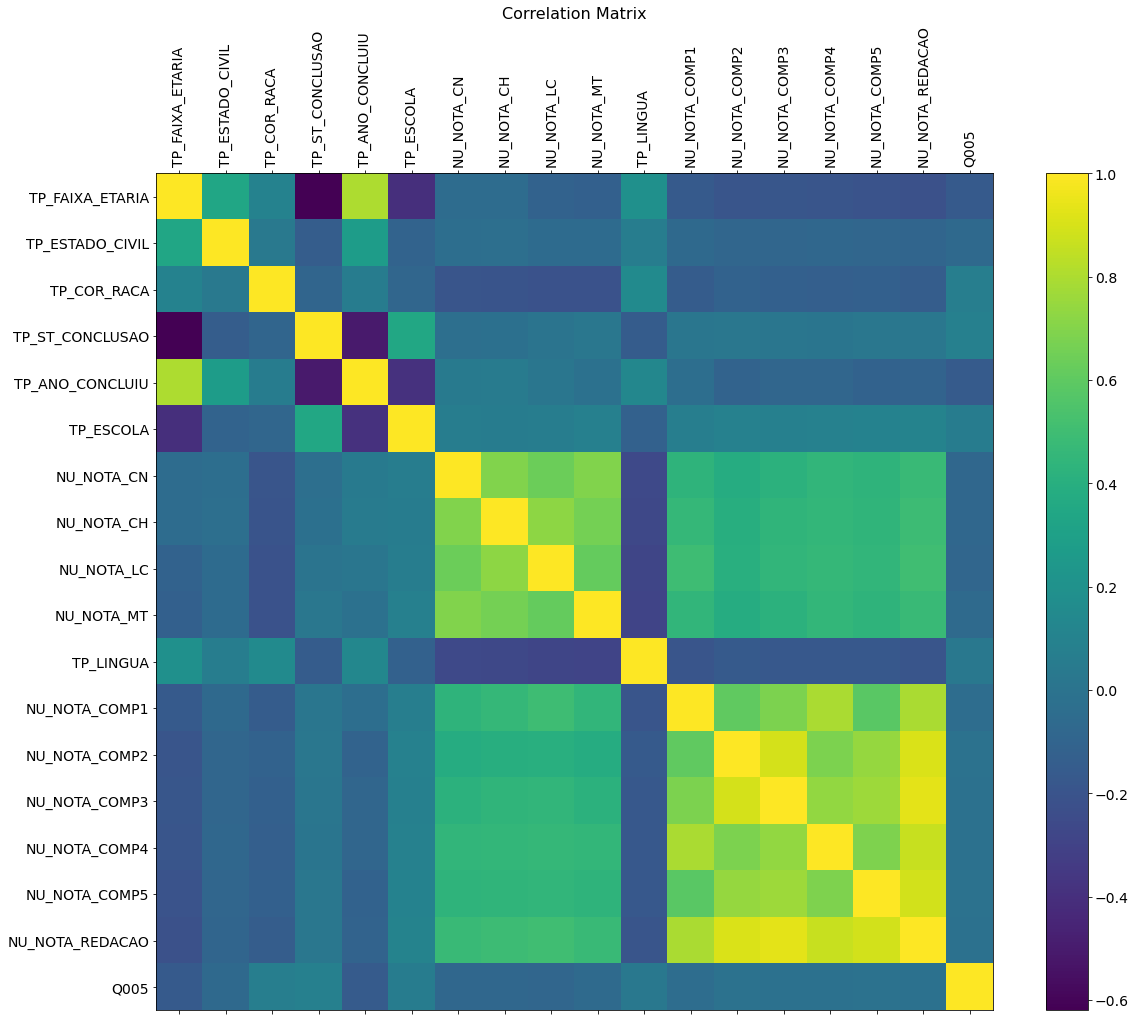

In [43]:
f = plt.figure(figsize=(19, 15))
plt.matshow(db.corr(), fignum=f.number)
plt.xticks(range(db.select_dtypes(['number']).shape[1]), db.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(db.select_dtypes(['number']).shape[1]), db.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

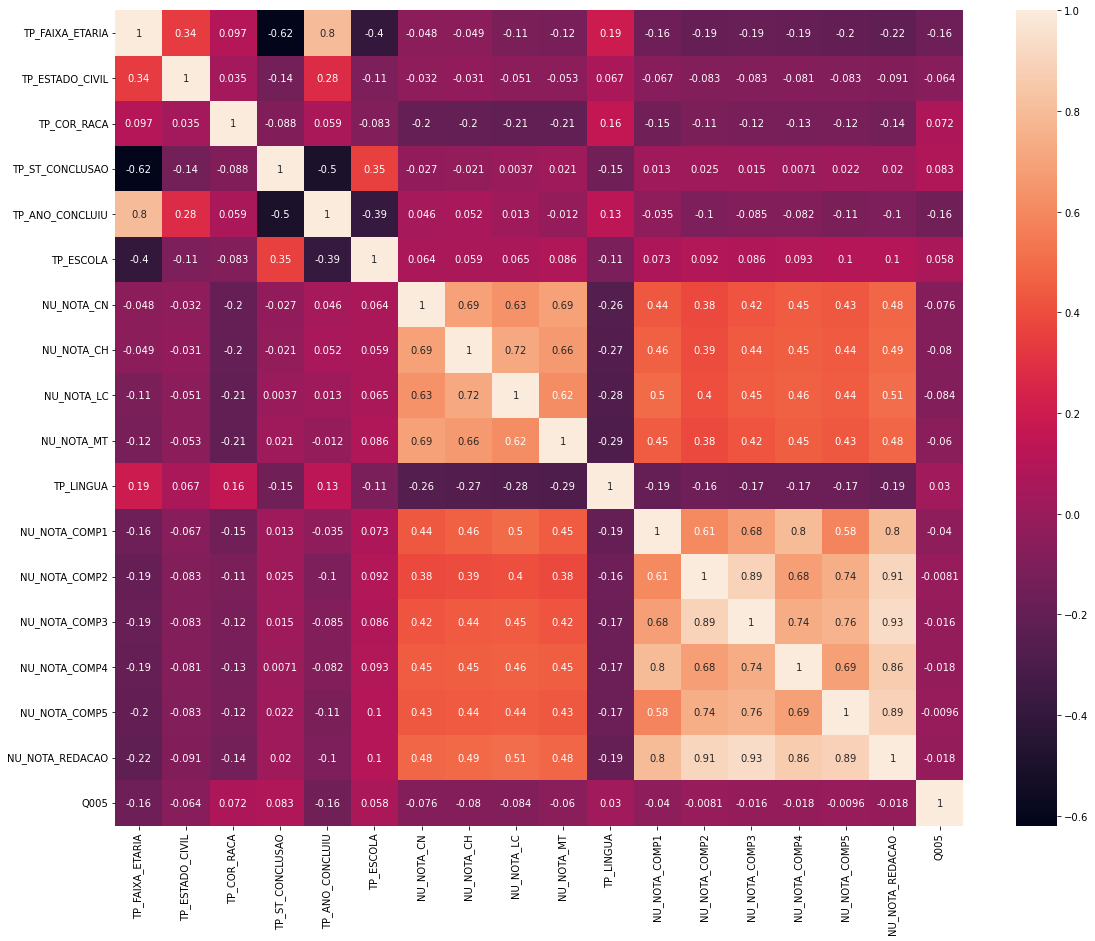

In [44]:
corr_matrix = db.corr()
plt.figure(figsize=(19, 15))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [45]:
db[((db['TP_ST_CONCLUSAO'] == 1) | (db['TP_ST_CONCLUSAO'] == 4)) & (db['TP_ANO_CONCLUIU'] == 0)]

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,SG_UF_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
11,7,M,1,1,1,0,1,BA,491.1,631.4,627.9,546.5,0,140.0,120.0,140.0,120.0,120.0,640.0,B,C,C,B,5.0,B,A,B,C,A,A,B,A,A,A,A,B,A,B,A,A,C,A,B,B
19,13,M,1,2,1,0,1,PA,486.0,503.3,439.8,405.6,1,100.0,100.0,120.0,100.0,80.0,500.0,C,D,C,C,5.0,D,A,C,C,A,A,B,A,A,A,A,A,A,B,B,A,C,A,A,A
39,13,F,2,3,1,0,1,SP,459.3,500.2,579.7,492.0,1,0.0,0.0,0.0,0.0,0.0,0.0,E,E,F,F,4.0,D,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A
44,11,M,1,3,1,0,1,SP,526.8,545.2,572.7,533.9,0,120.0,120.0,120.0,120.0,140.0,620.0,D,E,C,B,1.0,C,A,B,B,A,A,B,B,B,A,A,A,A,B,A,B,B,A,A,B
77,12,F,1,3,1,0,1,AL,359.3,416.7,478.0,339.8,1,120.0,120.0,120.0,120.0,160.0,640.0,A,A,A,A,3.0,B,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5782902,1,F,1,1,4,0,1,AM,452.2,544.7,569.0,631.3,0,160.0,120.0,120.0,120.0,120.0,640.0,D,E,D,D,4.0,N,A,C,D,B,B,B,B,B,B,B,B,B,C,A,A,C,A,D,B
5782913,6,M,1,3,1,0,1,SP,456.6,406.1,522.7,471.0,1,80.0,120.0,80.0,80.0,80.0,440.0,H,F,F,E,2.0,A,A,B,B,B,A,B,A,A,A,A,A,A,B,A,A,C,A,A,B
5782973,15,F,2,3,1,0,1,PR,484.6,562.5,536.5,445.0,1,80.0,80.0,120.0,120.0,40.0,440.0,E,B,B,B,3.0,F,A,B,C,B,A,B,B,B,A,B,A,A,C,A,A,D,B,B,B
5782975,3,F,0,3,1,0,1,AM,411.7,460.9,463.4,404.8,0,100.0,120.0,120.0,120.0,60.0,520.0,E,F,F,D,5.0,A,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A


In [46]:
# Como matriz de correlação, teoricamente, é apenas para valores numéricos
# Irei realizar a transformação de valores dos valores numericos que representam categoria
# TP_ESTADO_CIVIL
# TP_COR_RACA
# TP_ST_CONCLUSAO
# TP_ANO_CONCLUIU
# TP_ESCOLA
# TP_LINGUA

In [40]:
db.TP_ESTADO_CIVIL.replace([0, 1, 2, 3, 4], 
                           ['Nao Informado', 'Solteiro(a)', 'Casado(a)/Mora com companheiro(a)', 
                            'Divorciado(a)/Desquitado(a)/Separado(a)', 'Viuvo(a)'], inplace=True)

db.TP_COR_RACA.replace([0, 1, 2, 3, 4, 5], 
                       ['Nao declarado', 'Branca', 'Preta', 'Parda', 'Amarela', 'Indigena'], inplace=True)

db.TP_ST_CONCLUSAO.replace([1, 2, 3, 4], 
                           ['Concluiu o Ensino Medio', 'Esta cursando e concluira o Ensino Medio em 2020', 
                            'Esta cursando e concluira o Ensino Medio apos 2020', 
                            'Nao concluiu e não esta cursando o Ensino Medio'], inplace=True)

db.TP_ANO_CONCLUIU.replace([0, 1, 2, 3, 4, 5, 6, 7,
                           8, 9, 10, 11, 12, 13, 14], 
                           [15, 14, 13, 12, 11, 10, 9, 8,
                           7, 6, 5, 4, 3, 2, 1], inplace=True)

db.TP_ESCOLA.replace([1, 2, 3, 4], ['Nao Respondeu', 'Publica', 'Privada', 'Exterior'], inplace=True)

db.TP_LINGUA.replace([0, 1],
                    ['Ingles', 'Espanhol'], inplace=True)

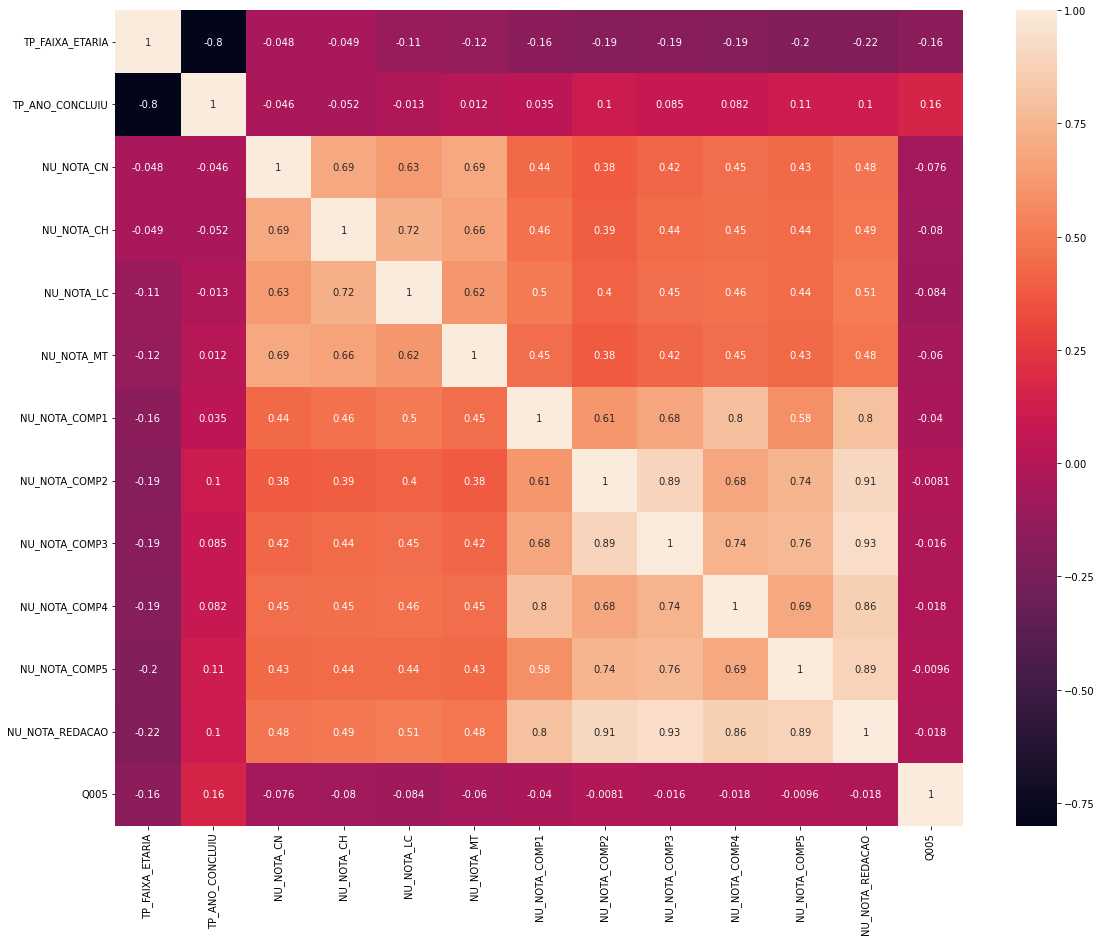

In [41]:
corr_matrix = db.corr()
plt.figure(figsize=(19, 15))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [49]:
db.head(1)

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,SG_UF_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
5,3,F,Solteiro(a),Parda,Concluiu o Ensino Medio,14,Nao Respondeu,RS,498.1,604.7,505.4,526.7,Espanhol,140.0,120.0,140.0,140.0,160.0,700.0,C,B,C,B,5.0,C,A,B,E,A,A,B,A,A,A,B,A,A,B,B,A,D,A,B,B


In [50]:
# Resultado não muda
# normalizando os valores antes de fazer correlação
colunas = ['TP_FAIXA_ETARIA', 'TP_ANO_CONCLUIU', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
          'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO',
          'Q005']
scaler = mms()
db[colunas] = scaler.fit_transform(db[colunas])
db

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,SG_UF_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
5,0.105263,F,Solteiro(a),Parda,Concluiu o Ensino Medio,0.928571,Nao Respondeu,RS,0.582709,0.701020,0.630883,0.540205,Espanhol,0.7,0.6,0.7,0.7,0.8,0.70,C,B,C,B,0.210526,C,A,B,E,A,A,B,A,A,A,B,A,A,B,B,A,D,A,B,B
8,0.210526,F,Casado(a)/Mora com companheiro(a),Parda,Concluiu o Ensino Medio,0.785714,Nao Respondeu,PB,0.514389,0.444586,0.606915,0.460000,Espanhol,0.6,0.6,0.6,0.7,0.5,0.60,B,C,C,B,0.052632,B,A,B,C,A,A,B,A,B,A,A,A,A,B,A,A,C,A,A,A
11,0.315789,M,Solteiro(a),Branca,Concluiu o Ensino Medio,1.000000,Nao Respondeu,BA,0.574520,0.731973,0.783797,0.560513,Ingles,0.7,0.6,0.7,0.6,0.6,0.64,B,C,C,B,0.210526,B,A,B,C,A,A,B,A,A,A,A,B,A,B,A,A,C,A,B,B
18,0.315789,F,Solteiro(a),Parda,Concluiu o Ensino Medio,0.785714,Nao Respondeu,AL,0.494151,0.565847,0.697915,0.431077,Ingles,0.7,0.9,0.7,0.8,0.9,0.80,C,C,C,B,0.052632,B,A,B,C,A,A,B,A,A,A,A,A,A,B,B,A,C,A,B,B
19,0.631579,M,Solteiro(a),Preta,Concluiu o Ensino Medio,1.000000,Nao Respondeu,PA,0.568554,0.583469,0.548995,0.416000,Espanhol,0.5,0.5,0.6,0.5,0.4,0.50,C,D,C,C,0.210526,D,A,C,C,A,A,B,A,A,A,A,A,A,B,B,A,C,A,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5783084,0.052632,M,Solteiro(a),Parda,Esta cursando e concluira o Ensino Medio em 2020,1.000000,Publica,PB,0.441741,0.469279,0.519036,0.421949,Ingles,0.5,0.2,0.2,0.6,0.2,0.34,B,D,A,F,0.157895,B,A,B,B,A,B,B,A,A,A,A,A,A,B,A,A,D,A,B,B
5783095,0.315789,F,Solteiro(a),Preta,Concluiu o Ensino Medio,0.857143,Nao Respondeu,AC,0.560131,0.484697,0.624142,0.341231,Espanhol,0.4,0.6,0.6,0.6,0.0,0.44,A,B,A,A,0.315789,C,A,B,D,A,A,B,A,A,A,B,A,A,B,A,A,D,A,A,A
5783101,0.052632,F,Solteiro(a),Parda,Esta cursando e concluira o Ensino Medio em 2020,1.000000,Publica,PA,0.460693,0.465105,0.583448,0.348718,Ingles,0.5,0.5,0.5,0.5,0.5,0.50,D,D,C,B,0.157895,C,A,B,C,A,B,B,A,A,A,B,A,A,B,A,A,D,A,A,A
5783104,0.052632,F,Solteiro(a),Branca,Esta cursando e concluira o Ensino Medio em 2020,1.000000,Publica,CE,0.594642,0.766752,0.821745,0.744308,Espanhol,0.8,1.0,0.9,0.8,1.0,0.90,E,G,A,D,0.210526,G,A,C,C,B,B,B,A,A,A,B,A,A,B,A,A,D,A,B,B


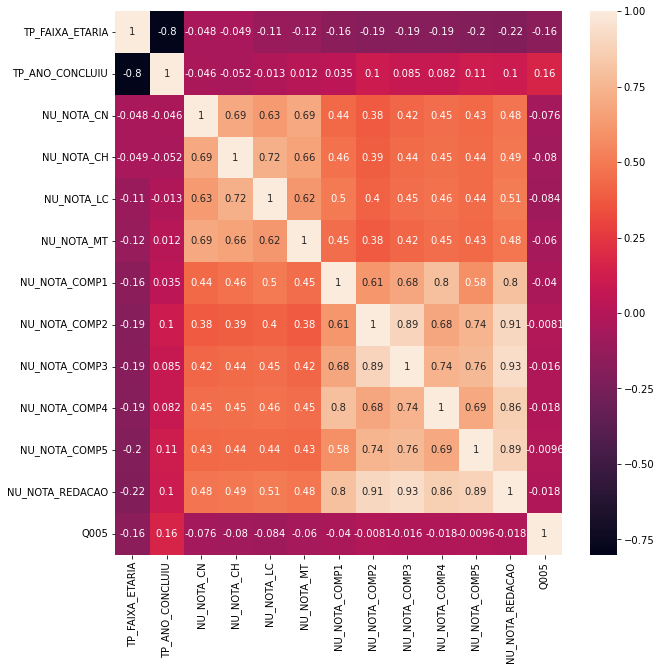

In [51]:
corr_matrix = db.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [42]:
#corr_matrix = db.corr()
lt = np.tril(corr_matrix, k=-1)
lt = np.where(lt==0, np.nan, lt)
lt = lt[1:]
lt = np.delete(lt, 12, 1)
lt = pd.DataFrame(lt, index=corr_matrix.index[1:], columns=corr_matrix.columns[:-1])

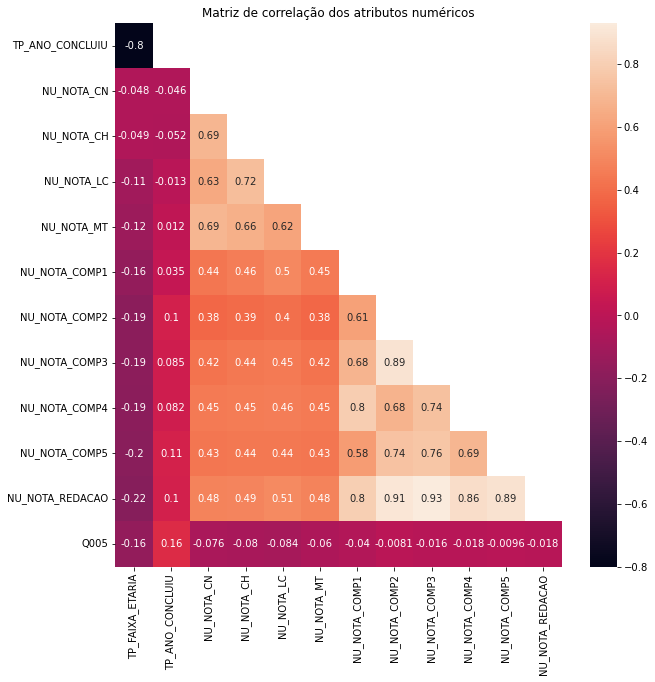

In [43]:
plt.figure(figsize=(10, 10))
sns.heatmap(lt, annot=True)
plt.title('Matriz de correlação dos atributos numéricos')
plt.show()

In [44]:
db.astype('object').describe()

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,SG_UF_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
count,2561304,2561304,2561304,2561304,2561304,2561304,2561304,2561304,2561304.0,2561304.0,2561304.0,2561304.0,2561304,2561304.0,2561304.0,2561304.0,2561304.0,2561304.0,2561304.0,2561304,2561304,2561304,2561304,2561304.0,2561304,2561304,2561304,2561304,2561304,2561304,2561304,2561304,2561304,2561304,2561304,2561304,2561304,2561304,2561304,2561304,2561304,2561304,2561304,2561304
unique,20,2,5,6,4,15,3,27,4777.0,4836.0,4571.0,6232.0,2,11.0,10.0,11.0,11.0,11.0,50.0,8,8,6,6,20.0,17,4,5,5,5,5,5,5,5,5,5,5,2,5,2,2,5,2,5,2
top,2,F,Solteiro(a),Parda,Concluiu o Ensino Medio,15,Nao Respondeu,SP,430.2,0.0,534.9,402.4,Ingles,120.0,120.0,120.0,120.0,40.0,560.0,E,E,C,B,4.0,B,A,B,C,A,A,B,A,B,A,A,A,A,B,A,A,C,A,A,B
freq,513778,1549651,2283733,1157403,1402720,1310599,1756231,376210,1342.0,2200.0,1542.0,1013.0,1310094,949201.0,1110755.0,866719.0,1006947.0,385413.0,156774.0,736397,881498,588986,1069594,867542.0,758530,2365891,1713280,1275774,1367988,1979270,2412711,1490034,1510882,2266578,1292399,2492213,2006415,1714583,1923914,2002043,755043,2036930,1132716,2150367


In [55]:
list(set(db.columns)-set(colunas))

['Q023',
 'Q024',
 'Q011',
 'Q020',
 'TP_ESCOLA',
 'Q016',
 'Q019',
 'TP_COR_RACA',
 'SG_UF_PROVA',
 'Q014',
 'Q013',
 'Q017',
 'Q025',
 'Q007',
 'Q022',
 'Q008',
 'Q009',
 'Q010',
 'TP_ESTADO_CIVIL',
 'TP_ST_CONCLUSAO',
 'Q006',
 'Q018',
 'Q002',
 'Q015',
 'TP_LINGUA',
 'Q001',
 'Q021',
 'TP_SEXO',
 'Q012',
 'Q004',
 'Q003']

In [56]:
db2 = db.copy()

In [57]:
# https://stackoverflow.com/questions/48035381/correlation-among-multiple-categorical-variables-pandas
label = LabelEncoder()
colunas2 = list(set(db.columns)-set(colunas))
for i in colunas2:
    db2[i]=label.fit_transform(db2[i])
db2

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,SG_UF_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
5,0.105263,0,3,4,0,0.928571,0,22,0.582709,0.701020,0.630883,0.540205,0,0.7,0.6,0.7,0.7,0.8,0.70,2,1,2,1,0.210526,2,0,1,4,0,0,1,0,0,0,1,0,0,1,1,0,3,0,1,1
8,0.210526,0,0,4,0,0.785714,0,14,0.514389,0.444586,0.606915,0.460000,0,0.6,0.6,0.6,0.7,0.5,0.60,1,2,2,1,0.052632,1,0,1,2,0,0,1,0,1,0,0,0,0,1,0,0,2,0,0,0
11,0.315789,1,3,1,0,1.000000,0,4,0.574520,0.731973,0.783797,0.560513,1,0.7,0.6,0.7,0.6,0.6,0.64,1,2,2,1,0.210526,1,0,1,2,0,0,1,0,0,0,0,1,0,1,0,0,2,0,1,1
18,0.315789,0,3,4,0,0.785714,0,1,0.494151,0.565847,0.697915,0.431077,1,0.7,0.9,0.7,0.8,0.9,0.80,2,2,2,1,0.052632,1,0,1,2,0,0,1,0,0,0,0,0,0,1,1,0,2,0,1,1
19,0.631579,1,3,5,0,1.000000,0,13,0.568554,0.583469,0.548995,0.416000,0,0.5,0.5,0.6,0.5,0.4,0.50,2,3,2,2,0.210526,3,0,2,2,0,0,1,0,0,0,0,0,0,1,1,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5783084,0.052632,1,3,4,2,1.000000,2,14,0.441741,0.469279,0.519036,0.421949,1,0.5,0.2,0.2,0.6,0.2,0.34,1,3,0,5,0.157895,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,3,0,1,1
5783095,0.315789,0,3,5,0,0.857143,0,0,0.560131,0.484697,0.624142,0.341231,0,0.4,0.6,0.6,0.6,0.0,0.44,0,1,0,0,0.315789,2,0,1,3,0,0,1,0,0,0,1,0,0,1,0,0,3,0,0,0
5783101,0.052632,0,3,4,2,1.000000,2,13,0.460693,0.465105,0.583448,0.348718,1,0.5,0.5,0.5,0.5,0.5,0.50,3,3,2,1,0.157895,2,0,1,2,0,1,1,0,0,0,1,0,0,1,0,0,3,0,0,0
5783104,0.052632,0,3,1,2,1.000000,2,5,0.594642,0.766752,0.821745,0.744308,0,0.8,1.0,0.9,0.8,1.0,0.90,4,6,0,3,0.210526,6,0,2,2,1,1,1,0,0,0,1,0,0,1,0,0,3,0,1,1


In [58]:
def cramers_V(var1,var2) :
    crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
    stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
    obs = np.sum(crosstab) # Number of observations
    mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
    return (stat/(obs*mini))

rows=[]  
for var1 in colunas2: #guess am making mistake here
    col=[]
    for var2 in colunas2: #guess am making mistake here
        cramers = cramers_V(db2[var1], db2[var2])
        col.append(round(cramers,2))
    rows.append(col)
cramers_results = np.array(rows) # issue could be here as well
df = pd.DataFrame(cramers_results,columns = colunas2, index=colunas2) # issue is here
df

,Q023,Q024,Q011,Q020,TP_ESCOLA,Q016,Q019,TP_COR_RACA,SG_UF_PROVA,Q014,Q013,Q017,Q025,Q007,Q022,Q008,Q009,Q010,TP_ESTADO_CIVIL,TP_ST_CONCLUSAO,Q006,Q018,Q002,Q015,TP_LINGUA,Q001,Q021,TP_SEXO,Q012,Q004,Q003
Q023,1.00,0.11,0.01,0.03,0.02,0.08,0.11,0.03,0.10,0.08,0.06,0.02,0.04,0.03,0.06,0.09,0.05,0.10,0.00,0.01,0.13,0.09,0.05,0.02,0.03,0.07,0.09,0.00,0.03,0.06,0.08
Q024,0.11,1.00,0.00,0.06,0.04,0.05,0.08,0.02,0.03,0.05,0.04,0.02,0.16,0.04,0.06,0.09,0.04,0.08,0.00,0.01,0.13,0.22,0.05,0.02,0.07,0.06,0.15,0.01,0.02,0.06,0.07
Q011,0.01,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Q020,0.03,0.06,0.00,1.00,0.01,0.03,0.08,0.01,0.02,0.02,0.04,0.01,0.01,0.02,0.04,0.05,0.03,0.04,0.00,0.01,0.06,0.05,0.01,0.02,0.01,0.03,0.04,0.00,0.02,0.02,0.03
TP_ESCOLA,0.02,0.04,0.00,0.01,1.00,0.02,0.04,0.01,0.01,0.01,0.02,0.01,0.01,0.02,0.02,0.04,0.02,0.03,0.01,0.50,0.06,0.04,0.03,0.01,0.02,0.04,0.05,0.00,0.01,0.04,0.04
Q016,0.08,0.05,0.00,0.03,0.02,1.00,0.05,0.02,0.04,0.08,0.04,0.07,0.10,0.01,0.03,0.04,0.02,0.05,0.00,0.01,0.06,0.15,0.02,0.06,0.05,0.02,0.09,0.00,0.03,0.03,0.03
Q019,0.11,0.08,0.00,0.08,0.04,0.05,1.00,0.02,0.02,0.04,0.05,0.02,0.06,0.05,0.06,0.10,0.06,0.07,0.00,0.01,0.10,0.20,0.03,0.01,0.05,0.04,0.19,0.01,0.04,0.04,0.05
TP_COR_RACA,0.03,0.02,0.00,0.01,0.01,0.02,0.02,1.00,0.04,0.02,0.01,0.00,0.03,0.01,0.01,0.02,0.01,0.03,0.00,0.01,0.02,0.09,0.01,0.00,0.03,0.01,0.04,0.00,0.00,0.01,0.01
SG_UF_PROVA,0.10,0.03,0.01,0.02,0.01,0.04,0.02,0.04,1.00,0.05,0.03,0.00,0.08,0.00,0.01,0.01,0.01,0.04,0.00,0.01,0.01,0.16,0.01,0.02,0.06,0.01,0.06,0.00,0.01,0.02,0.02
Q014,0.08,0.05,0.01,0.02,0.01,0.08,0.04,0.02,0.05,1.00,0.04,0.05,0.11,0.01,0.04,0.04,0.03,0.06,0.00,0.01,0.06,0.15,0.02,0.10,0.05,0.03,0.10,0.00,0.02,0.03,0.04


In [59]:
df

,Q023,Q024,Q011,Q020,TP_ESCOLA,Q016,Q019,TP_COR_RACA,SG_UF_PROVA,Q014,Q013,Q017,Q025,Q007,Q022,Q008,Q009,Q010,TP_ESTADO_CIVIL,TP_ST_CONCLUSAO,Q006,Q018,Q002,Q015,TP_LINGUA,Q001,Q021,TP_SEXO,Q012,Q004,Q003
Q023,1.00,0.11,0.01,0.03,0.02,0.08,0.11,0.03,0.10,0.08,0.06,0.02,0.04,0.03,0.06,0.09,0.05,0.10,0.00,0.01,0.13,0.09,0.05,0.02,0.03,0.07,0.09,0.00,0.03,0.06,0.08
Q024,0.11,1.00,0.00,0.06,0.04,0.05,0.08,0.02,0.03,0.05,0.04,0.02,0.16,0.04,0.06,0.09,0.04,0.08,0.00,0.01,0.13,0.22,0.05,0.02,0.07,0.06,0.15,0.01,0.02,0.06,0.07
Q011,0.01,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Q020,0.03,0.06,0.00,1.00,0.01,0.03,0.08,0.01,0.02,0.02,0.04,0.01,0.01,0.02,0.04,0.05,0.03,0.04,0.00,0.01,0.06,0.05,0.01,0.02,0.01,0.03,0.04,0.00,0.02,0.02,0.03
TP_ESCOLA,0.02,0.04,0.00,0.01,1.00,0.02,0.04,0.01,0.01,0.01,0.02,0.01,0.01,0.02,0.02,0.04,0.02,0.03,0.01,0.50,0.06,0.04,0.03,0.01,0.02,0.04,0.05,0.00,0.01,0.04,0.04
Q016,0.08,0.05,0.00,0.03,0.02,1.00,0.05,0.02,0.04,0.08,0.04,0.07,0.10,0.01,0.03,0.04,0.02,0.05,0.00,0.01,0.06,0.15,0.02,0.06,0.05,0.02,0.09,0.00,0.03,0.03,0.03
Q019,0.11,0.08,0.00,0.08,0.04,0.05,1.00,0.02,0.02,0.04,0.05,0.02,0.06,0.05,0.06,0.10,0.06,0.07,0.00,0.01,0.10,0.20,0.03,0.01,0.05,0.04,0.19,0.01,0.04,0.04,0.05
TP_COR_RACA,0.03,0.02,0.00,0.01,0.01,0.02,0.02,1.00,0.04,0.02,0.01,0.00,0.03,0.01,0.01,0.02,0.01,0.03,0.00,0.01,0.02,0.09,0.01,0.00,0.03,0.01,0.04,0.00,0.00,0.01,0.01
SG_UF_PROVA,0.10,0.03,0.01,0.02,0.01,0.04,0.02,0.04,1.00,0.05,0.03,0.00,0.08,0.00,0.01,0.01,0.01,0.04,0.00,0.01,0.01,0.16,0.01,0.02,0.06,0.01,0.06,0.00,0.01,0.02,0.02
Q014,0.08,0.05,0.01,0.02,0.01,0.08,0.04,0.02,0.05,1.00,0.04,0.05,0.11,0.01,0.04,0.04,0.03,0.06,0.00,0.01,0.06,0.15,0.02,0.10,0.05,0.03,0.10,0.00,0.02,0.03,0.04


In [60]:
lt = np.tril(df, k=-1)
#lt = np.where(lt==0, np.nan, lt)
lt = lt[1:]
lt = np.delete(lt, -1, 1)
lt = pd.DataFrame(lt, index=df.index[1:], columns=df.columns[:-1])

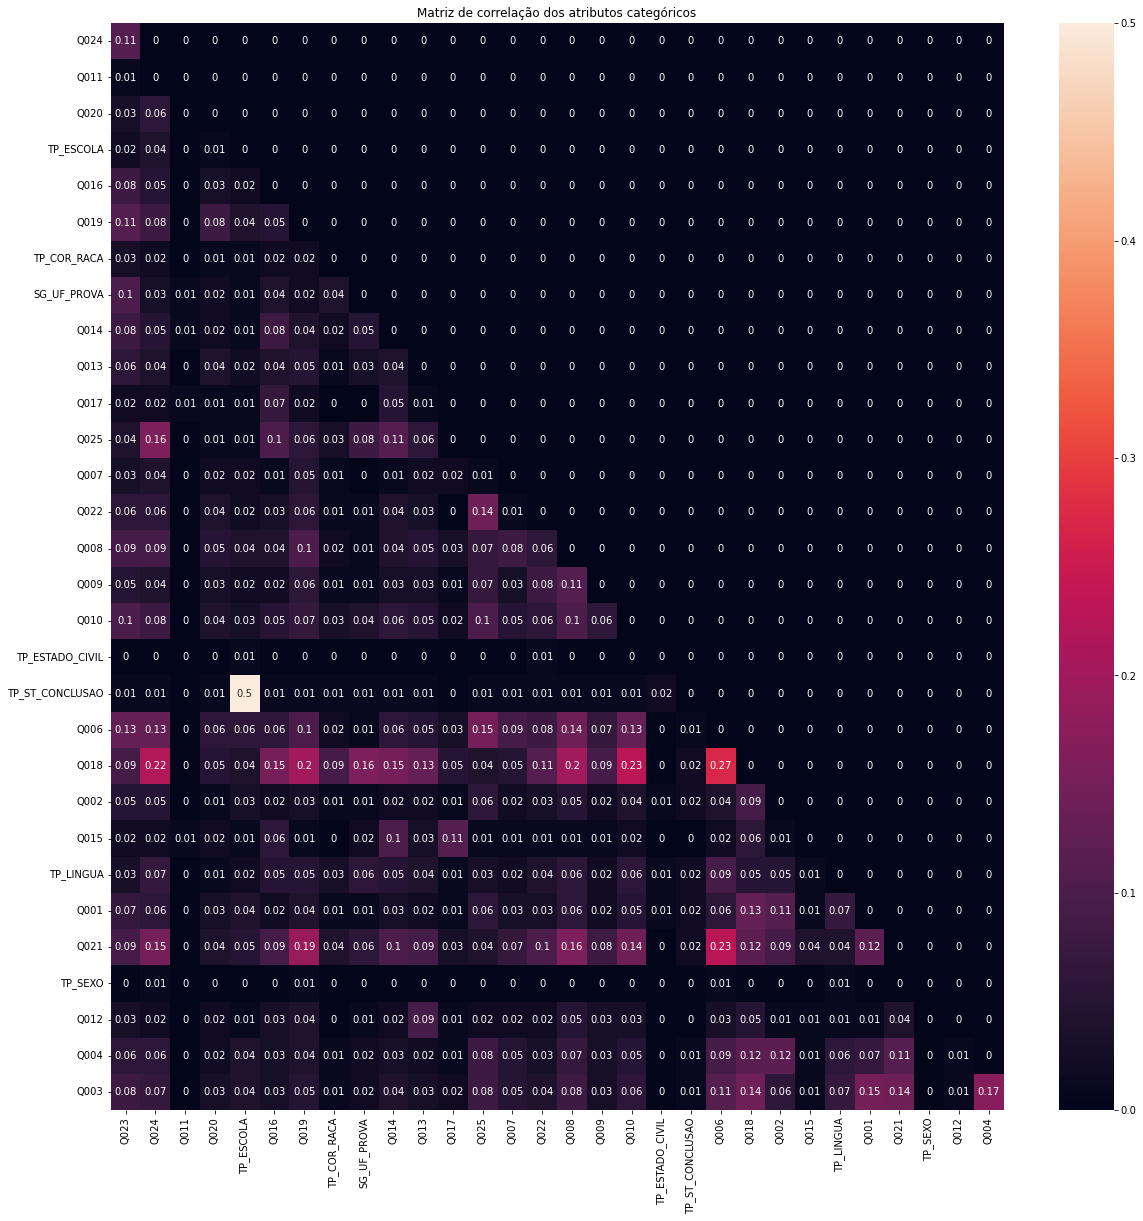

In [61]:
plt.figure(figsize=(20, 20))
sns.heatmap(lt, annot=True)
plt.title('Matriz de correlação dos atributos categóricos')
plt.show()

In [1]:
lt

NameError: name 'lt' is not defined

# Categorizando Atributos numéricos

In [25]:
db.shape

(2561304, 44)

In [26]:
db.columns

Index(['TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'SG_UF_PROVA',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'TP_LINGUA',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',
       'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013',
       'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022',
       'Q023', 'Q024', 'Q025'],
      dtype='object')

Participante

In [27]:
#Jovens = 15~29 (mas será 15~30 devido as opcoes disponiveis) segundo a LEI Nº 12.852 https://www.planalto.gov.br/ccivil_03/_ato2011-2014/2013/lei/l12852.htm
#Adolescente = 15~18 (12~18, segundo a LEI Nº 8.069) https://www.planalto.gov.br/ccivil_03/LEIS/L8069.htm
#Jovem Adulto = 19~29 (mas será 19~30 devido as opcoes disponiveis)
#Adulto = 31~59 (mas será 31~60 devido as opcoes disponiveis)
#Idoso = 60+ (mas será 61+ devido as opcoes disponiveis) segundo a LEI No 10.741 https://www.planalto.gov.br/ccivil_03/leis/2003/l10.741.htm
db.TP_FAIXA_ETARIA.replace([1, 2, 3, 
                            4, 5, 6, 7, 8, 9, 10, 11, 
                            12, 13, 14, 15, 16, 17, 
                            18, 19, 20], 
                           ['Adolescente', 'Adolescente', 'Adolescente', 
                            'Jovem', 'Jovem', 'Jovem', 'Jovem', 'Jovem', 'Jovem', 'Jovem', 'Jovem', 
                           'Adulto', 'Adulto', 'Adulto', 'Adulto', 'Adulto', 'Adulto', 
                           'Idoso', 'Idoso', 'Idoso'], inplace=True)

In [28]:
# Estado civil em TP_ESTADO_CIVIL
db.TP_ESTADO_CIVIL.replace([0, 1, 2, 3, 4], 
                           ['Nao Informado', 'Solteiro(a)', 'Casado(a)/Mora com companheiro(a)', 
                            'Divorciado(a)/Desquitado(a)/Separado(a)', 'Viuvo(a)'], inplace=True)

In [29]:
# Cor/raça em TP_COR_RACA
db.TP_COR_RACA.replace([0, 1, 2, 3, 4, 5], 
                       ['Nao declarado', 'Branca', 'Preta', 'Parda', 'Amarela', 'Indigena'], inplace=True)

-

<AxesSubplot:ylabel='TP_ANO_CONCLUIU'>

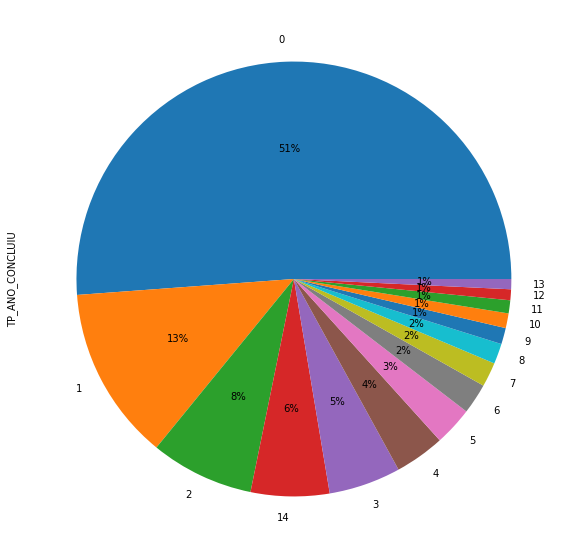

In [30]:
db["TP_ANO_CONCLUIU"].value_counts().plot.pie(autopct='%1.0f%%', figsize=(10, 10))

In [31]:
# Juntar TP_ANO_CONCLUIU com item 1 de TP_ST_CONCLUSAO
# fazer intervalos do TP_ANO_CONCLUIU  (2019 e 2018, 2015 a 2017, 2011 a 2014, antes de 2007 a 2010)
conditions = [
    (db['TP_ST_CONCLUSAO'] == 4), # Nao conclui e nao estou cursando o EM
    (db['TP_ST_CONCLUSAO'] == 3), # Concluirei o EM apos 2020
    (db['TP_ST_CONCLUSAO'] == 2), # Concluirei o EM em 2020
    (db['TP_ST_CONCLUSAO'] == 1) & (db['TP_ANO_CONCLUIU'] == 0),  # Conclui o EM mas nao informei o ano de conclusao
    (db['TP_ST_CONCLUSAO'] == 1) & (db['TP_ANO_CONCLUIU'] == 1),  # 2019 - Conclui o EM entre 2017 e 2019
    (db['TP_ST_CONCLUSAO'] == 1) & (db['TP_ANO_CONCLUIU'] == 2),  # 2018 - Conclui o EM entre 2017 e 2019
    (db['TP_ST_CONCLUSAO'] == 1) & (db['TP_ANO_CONCLUIU'] == 3),  # 2017 - Conclui o EM entre 2017 e 2019
    (db['TP_ST_CONCLUSAO'] == 1) & (db['TP_ANO_CONCLUIU'] == 4),  # 2016 - Conclui o EM antes de 2017
    (db['TP_ST_CONCLUSAO'] == 1) & (db['TP_ANO_CONCLUIU'] == 5),  # 2015 - Conclui o EM antes de 2017
    (db['TP_ST_CONCLUSAO'] == 1) & (db['TP_ANO_CONCLUIU'] == 6),  # 2014 - Conclui o EM antes de 2017
    (db['TP_ST_CONCLUSAO'] == 1) & (db['TP_ANO_CONCLUIU'] == 7),  # 2013 - Conclui o EM antes de 2017
    (db['TP_ST_CONCLUSAO'] == 1) & (db['TP_ANO_CONCLUIU'] == 8),  # 2012 - Conclui o EM antes de 2017
    (db['TP_ST_CONCLUSAO'] == 1) & (db['TP_ANO_CONCLUIU'] == 9),  # 2011 - Conclui o EM antes de 2017
    (db['TP_ST_CONCLUSAO'] == 1) & (db['TP_ANO_CONCLUIU'] == 10), # 2010 - Conclui o EM antes de 2017
    (db['TP_ST_CONCLUSAO'] == 1) & (db['TP_ANO_CONCLUIU'] == 11), # 2009 - Conclui o EM antes de 2017
    (db['TP_ST_CONCLUSAO'] == 1) & (db['TP_ANO_CONCLUIU'] == 12), # 2008 - Conclui o EM antes de 2017
    (db['TP_ST_CONCLUSAO'] == 1) & (db['TP_ANO_CONCLUIU'] == 13), # 2007 - Conclui o EM antes de 2017
    (db['TP_ST_CONCLUSAO'] == 1) & (db['TP_ANO_CONCLUIU'] == 14)  # 2007-  - Conclui o EM antes de 2017
]

values = ['Nao conclui e nao estou cursando o EM', 
          'Concluirei o EM apos 2020',
          'Concluirei o EM em 2020', 
          'Conclui o EM mas nao informei o ano de conclusao',
          'Conclui o EM entre 2017 e 2019', 'Conclui o EM entre 2017 e 2019', 'Conclui o EM entre 2017 e 2019', 
          'Conclui o EM antes de 2017', 'Conclui o EM antes de 2017',
          'Conclui o EM antes de 2017', 'Conclui o EM antes de 2017', 'Conclui o EM antes de 2017', 'Conclui o EM antes de 2017',
          'Conclui o EM antes de 2017', 'Conclui o EM antes de 2017', 'Conclui o EM antes de 2017',
          'Conclui o EM antes de 2017', 'Conclui o EM antes de 2017']
db['EM_CONCLUSAO'] = np.select(conditions, values)

#Como as colunas TP_ANO_CONCLUIU e TP_ST_CONCLUSAO foram unidos na coluna EM_CONCLUSAO, essas colunas foram removidas
db.drop('TP_ST_CONCLUSAO', inplace=True, axis=1)
db.drop('TP_ANO_CONCLUIU', inplace=True, axis=1)

# nao estou cursando e nao conclui
# concluirei após 2020
# concluirei em 2020
# Conclui mas n informei
# conclui entre 2017 e 2019
# conclui antes de 2017

<AxesSubplot:ylabel='EM_CONCLUSAO'>

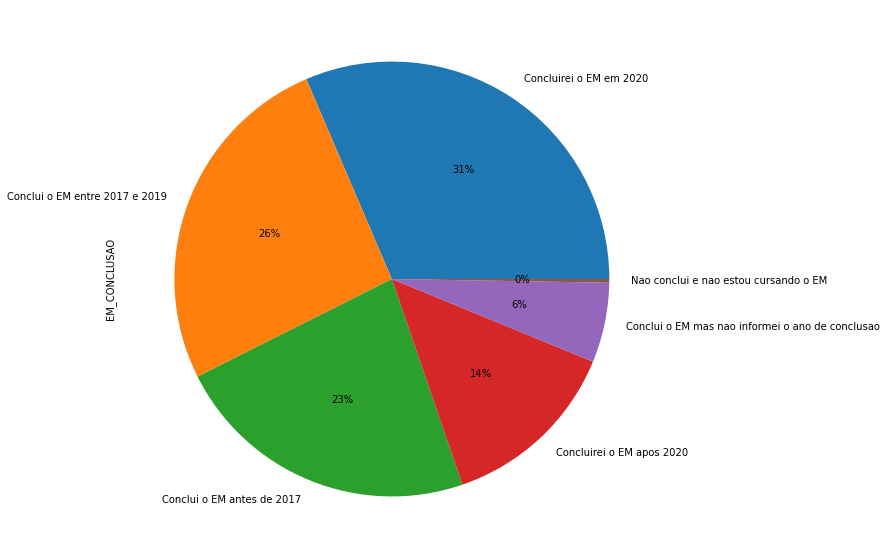

In [32]:
db["EM_CONCLUSAO"].value_counts().plot.pie(autopct='%1.0f%%', figsize=(10, 10))

In [33]:
db.shape

(2561304, 43)

In [34]:
db.columns

Index(['TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_ESCOLA', 'SG_UF_PROVA', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TP_LINGUA', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2',
       'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO',
       'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009',
       'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018',
       'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025', 'EM_CONCLUSAO'],
      dtype='object')

In [35]:
# Tipo de escola do Ensino Medio em TP_ESCOLA
db.TP_ESCOLA.replace([1, 2, 3, 4], ['Nao Respondeu', 'Publica', 'Privada', 'Exterior'], inplace=True)

Local de aplicação da prova

In [36]:
# regiões do brasil (Norte, Nordeste, Centro-Oeste, Sul e Sudeste) com base em CO_UF_PROVA e SG_UF_PROV
db.SG_UF_PROVA.replace(['AM', 'RR', 'AP', 'PA', 'TO', 'RO', 'AC',
                       'MA', 'PI', 'CE', 'RN', 'PE', 'PB', 'SE', 'AL', 'BA',
                       'MT', 'MS', 'GO', 'DF',
                       'SP', 'RJ', 'ES', 'MG',
                       'PR', 'RS', 'SC'], 
                       ['Norte', 'Norte', 'Norte', 'Norte', 'Norte', 'Norte', 'Norte', 
                       'Nordeste', 'Nordeste', 'Nordeste', 'Nordeste', 'Nordeste', 'Nordeste', 'Nordeste', 'Nordeste', 'Nordeste',
                       'Centro-Oeste', 'Centro-Oeste', 'Centro-Oeste', 'Centro-Oeste',
                       'Sudeste', 'Sudeste', 'Sudeste', 'Sudeste',
                       'Sul', 'Sul', 'Sul', ], inplace=True)
db.rename(columns = {'SG_UF_PROVA':'REGIAO_PROVA'}, inplace = True)

Prova Objetiva

In [37]:
#Lingua Estrangeira em TP_LINGUA
db.TP_LINGUA.replace([0, 1],
                    ['Ingles', 'Espanhol'], inplace=True)

Redação

In [38]:
db.columns

Index(['TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_ESCOLA', 'REGIAO_PROVA', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TP_LINGUA', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2',
       'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO',
       'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009',
       'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018',
       'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025', 'EM_CONCLUSAO'],
      dtype='object')

Questionario Socioeconomico

<AxesSubplot:ylabel='Q001'>

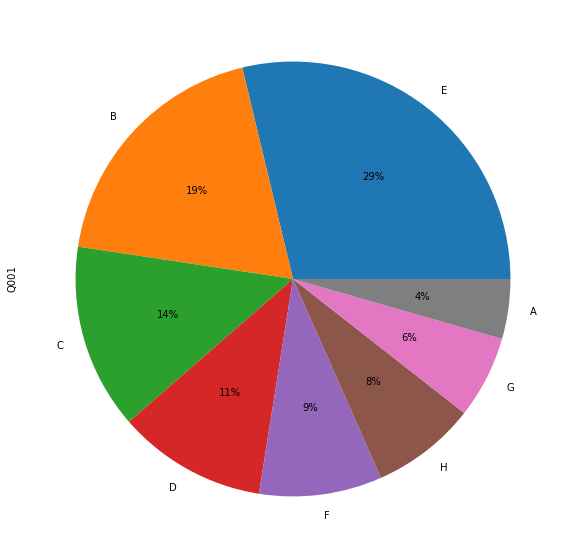

In [39]:
db["Q001"].value_counts().plot.pie(autopct='%1.0f%%', figsize=(10, 10))

In [40]:
# Q001
db.Q001.replace(['A', 'D', 'E', 'H'], ['Nunca estudou', 'Fundamental completo', 'Medio', 'Não sabe'], inplace=True)
db.Q001.replace(['B', 'C'], ['Fundamental incompleto', 'Fundamental incompleto'], inplace=True)
db.Q001.replace(['F', 'G'], ['Superior', 'Superior'], inplace=True)
db.rename(columns = {'Q001':'Q01_Educacao_Pai'}, inplace = True)

<AxesSubplot:ylabel='Q01_Educacao_Pai'>

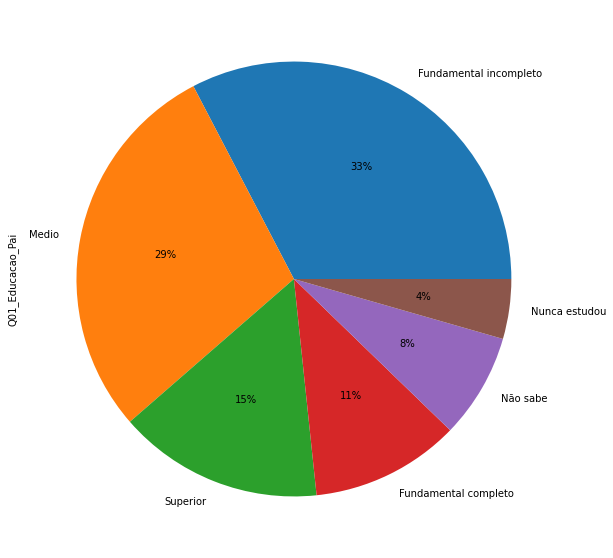

In [41]:
db["Q01_Educacao_Pai"].value_counts().plot.pie(autopct='%1.0f%%', figsize=(10, 10))

-

<AxesSubplot:ylabel='Q002'>

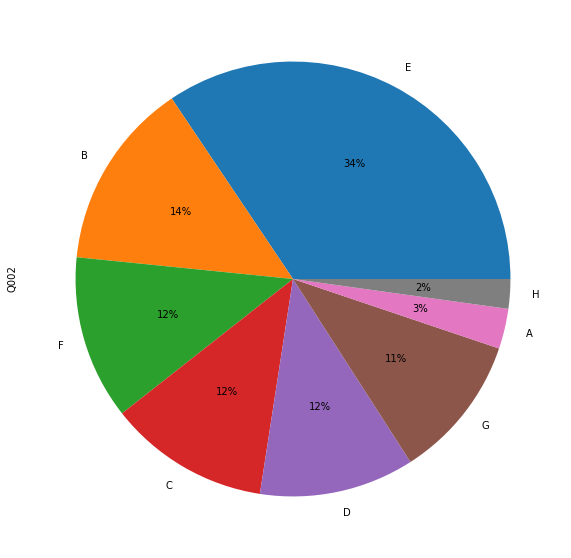

In [42]:
db["Q002"].value_counts().plot.pie(autopct='%1.0f%%', figsize=(10, 10))

In [43]:
# Q002
db.Q002.replace(['A', 'D', 'E', 'H'], ['Nunca estudou', 'Fundamental completo', 'Medio', 'Não sabe'], inplace=True)
db.Q002.replace(['B', 'C'], ['Fundamental incompleto', 'Fundamental incompleto'], inplace=True)
db.Q002.replace(['F', 'G'], ['Superior', 'Superior'], inplace=True)
db.rename(columns = {'Q002':'Q02_Educacao_Mae'}, inplace = True)

<AxesSubplot:ylabel='Q02_Educacao_Mae'>

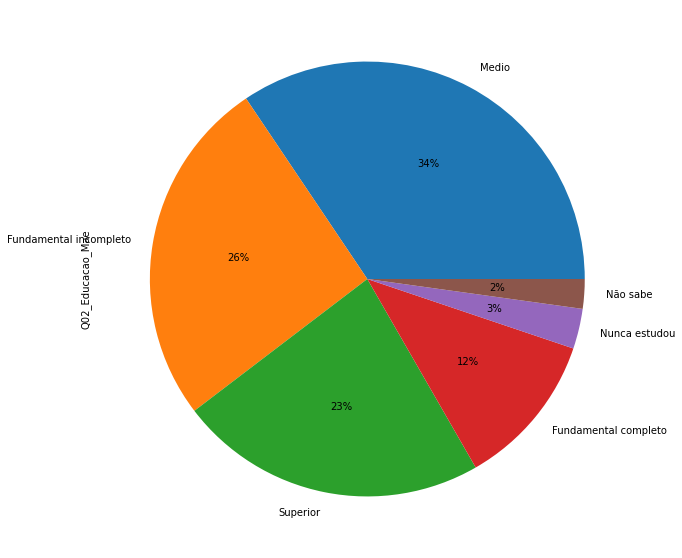

In [44]:
db["Q02_Educacao_Mae"].value_counts().plot.pie(autopct='%1.0f%%', figsize=(10, 10))

-

<AxesSubplot:ylabel='Q003'>

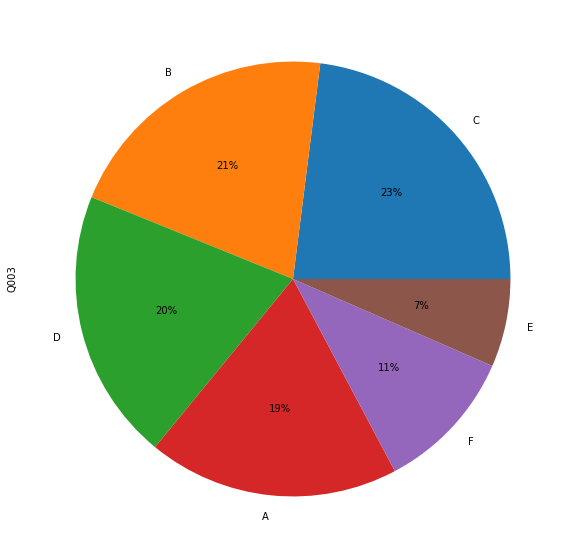

In [45]:
db["Q003"].value_counts().plot.pie(autopct='%1.0f%%', figsize=(10, 10))

In [46]:
# Q003
db.Q003.replace(['A', 'B', 'C', 'D',
                 'E', 'F'], 
                ['Grupo 1', 'Grupo 2', 'Grupo 3', 'Grupo 4',
                 'Grupo 5', 'Nao Sei'], inplace=True)
db.rename(columns = {'Q003':'Q03_Grupo_Ocupacao_Pai'}, inplace = True)

<AxesSubplot:ylabel='Q03_Grupo_Ocupacao_Pai'>

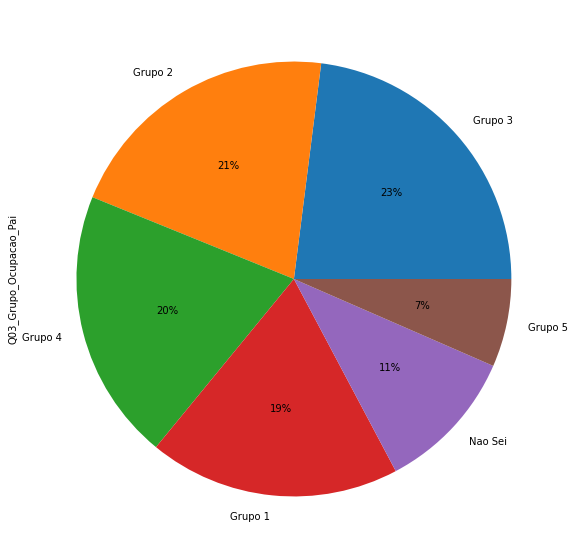

In [47]:
db["Q03_Grupo_Ocupacao_Pai"].value_counts().plot.pie(autopct='%1.0f%%', figsize=(10, 10))

-

<AxesSubplot:ylabel='Q004'>

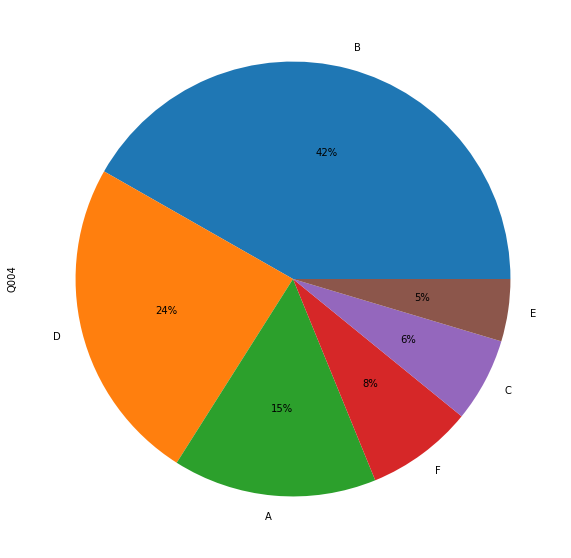

In [48]:
db["Q004"].value_counts().plot.pie(autopct='%1.0f%%', figsize=(10, 10))

In [49]:
# Q004
db.Q004.replace(['A', 'B', 'C', 'D',
                 'E', 'F'], 
                ['Grupo 1', 'Grupo 2', 'Grupo 3', 'Grupo 4',
                 'Grupo 5', 'Nao Sei'], inplace=True)
db.rename(columns = {'Q004':'Q04_Grupo_Ocupacao_Mae'}, inplace = True)

<AxesSubplot:ylabel='Q04_Grupo_Ocupacao_Mae'>

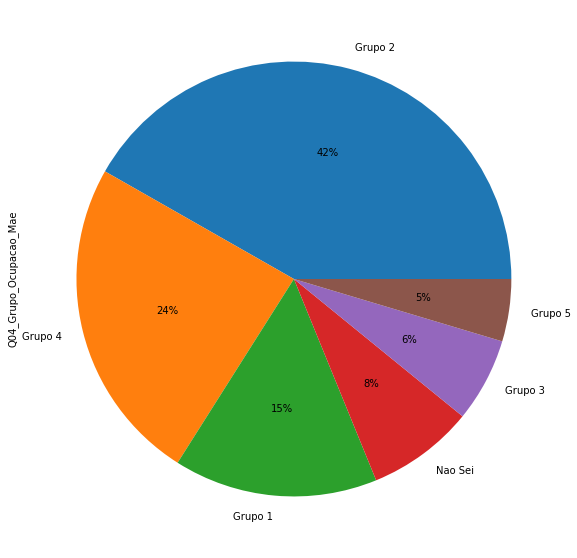

In [50]:
db["Q04_Grupo_Ocupacao_Mae"].value_counts().plot.pie(autopct='%1.0f%%', figsize=(10, 10))

-

<AxesSubplot:ylabel='Q005'>

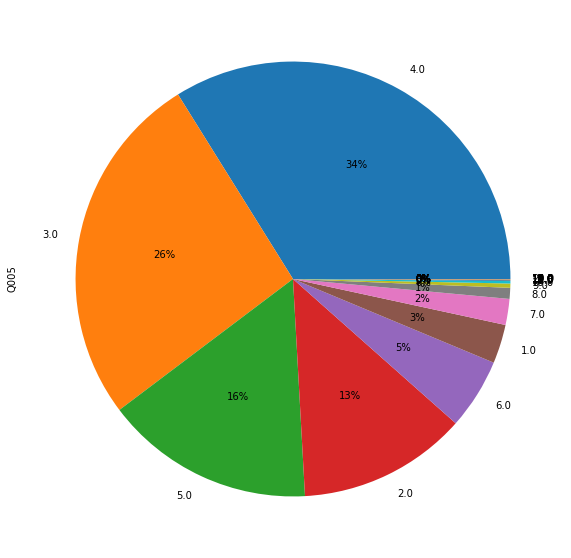

In [51]:
db["Q005"].value_counts().plot.pie(autopct='%1.0f%%', figsize=(10, 10))

In [52]:
# Q005 (1; 2; 3; 4; 5 a 10; + de 10)~pesquisar como fazem essa divisão em outras pesquisas
# A - 1; B - 2 ;C - 3 ;D - 4 ;E - 5~10 ;F - 10+
db.Q005.replace([1, 2, 3, 4,
                 5, 6, 7, 8, 9, 10,
                11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 
                ['1', '2', '3', '4',
                 '5-10', '5-10', '5-10', '5-10', '5-10', '5-10',
                '11-20', '11-20', '11-20', '11-20', '11-20', '11-20', '11-20', '11-20', '11-20', '11-20'], inplace=True)
db.rename(columns = {'Q005':'Q05_Moradores/Residencia'}, inplace = True)

<AxesSubplot:ylabel='Q05_Moradores/Residencia'>

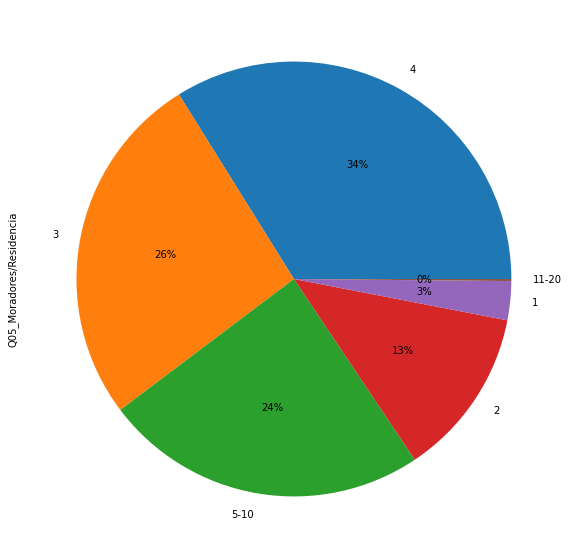

In [53]:
db["Q05_Moradores/Residencia"].value_counts().plot.pie(autopct='%1.0f%%', figsize=(10, 10))

-

<AxesSubplot:ylabel='Q006'>

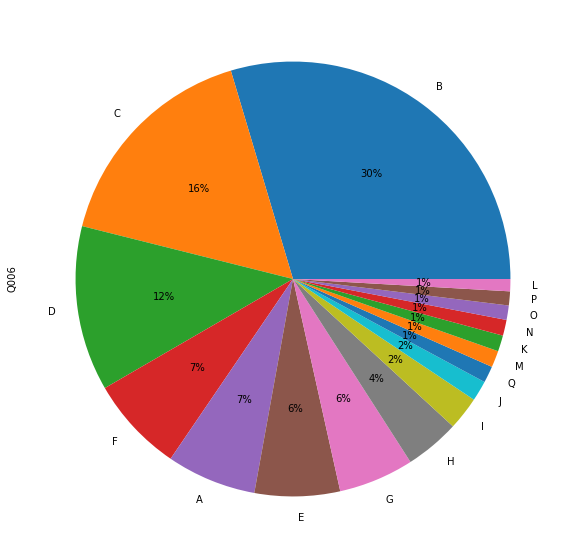

In [54]:
db["Q006"].value_counts().plot.pie(autopct='%1.0f%%', figsize=(10, 10))

In [55]:
"""
Q006 Renda Familiar (Dividir por classes?)
salario minimo 2020: 1045,00 (https://www.contabeis.com.br/tabelas/salario-minimo/)
motivo da divisão salário https://www.ibge.gov.br/estatisticas/sociais/educacao/17374-indicadores-sociais-minimos.html?=&t=resultados
classes:
    sem renda
    E 
    D
    C
    B
    A
# Devido análise estatística, vimos que para as classes C, B e A aparecerem nas regras de associação, o suporte deveria ser
#muito baixo (abaixo de 10%), o que torna inviável, logo, decidimos recategorizar as classes em:
# Classe Baixa = Classe E e Sem Renda
# Classe Média = Classe D e C
# Classe Alta = Classe B e A"""
db.Q006.replace(['A',  # sem renda
                 'B', 'C', 'D', # classe E
                 'E', 'F', 'G', 'H', # classe D
                 'I', 'J', 'K', 'L', 'M', # classe C
                 'N', 'O', 'P', # classe B
                 'Q'], # classe A 
                ['Classe Baixa', 
                 'Classe Baixa', 'Classe Baixa', 'Classe Baixa',
                 'Classe Media', 'Classe Media', 'Classe Media', 'Classe Media',
                 'Classe Media', 'Classe Media', 'Classe Media', 'Classe Media', 'Classe Media',
                 'Classe Alta', 'Classe Alta', 'Classe Alta',
                 'Classe Alta'], inplace=True)
db.rename(columns = {'Q006':'Q06_Renda_Familiar_Mensal'}, inplace = True)

<AxesSubplot:ylabel='Q06_Renda_Familiar_Mensal'>

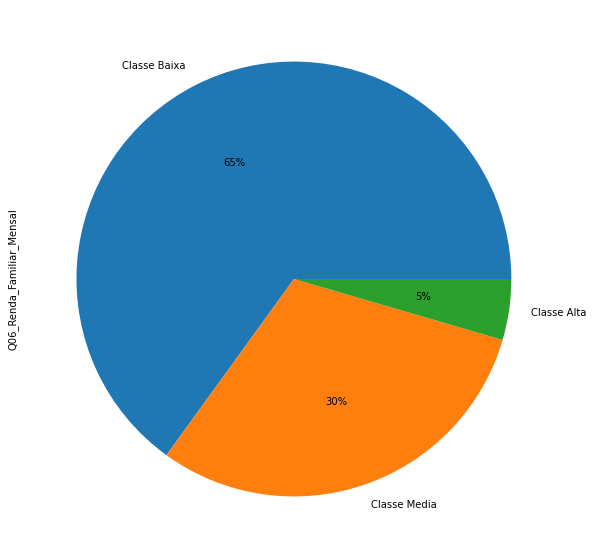

In [56]:
db["Q06_Renda_Familiar_Mensal"].value_counts().plot.pie(autopct='%1.0f%%', figsize=(10, 10))

-

<AxesSubplot:ylabel='Q007'>

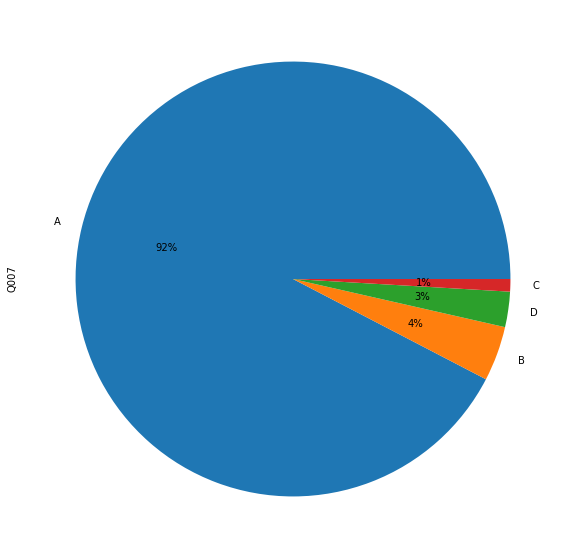

In [57]:
#db.groupby(['Q006']).sum().plot(kind='pie', subplots=True, autopct='%1.0f%%')
db["Q007"].value_counts().plot.pie(autopct='%1.0f%%', figsize=(10, 10))

In [58]:
# Q007 (Nao; Sim)
# A - Nao 
# B, C e D - Sim
db.Q007.replace(['A',
                 'B', 'C', 'D'], 
                ['Nao',
                 'Sim', 'Sim', 'Sim'], inplace=True)
db.rename(columns = {'Q007':'Q07_Empregado_Domestico'}, inplace = True)

<AxesSubplot:ylabel='Q07_Empregado_Domestico'>

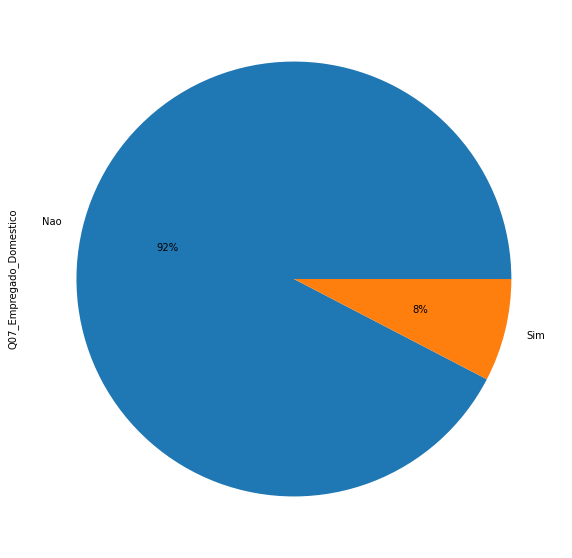

In [60]:
db["Q07_Empregado_Domestico"].value_counts().plot.pie(autopct='%1.0f%%', figsize=(10, 10))

-

<AxesSubplot:ylabel='Q008'>

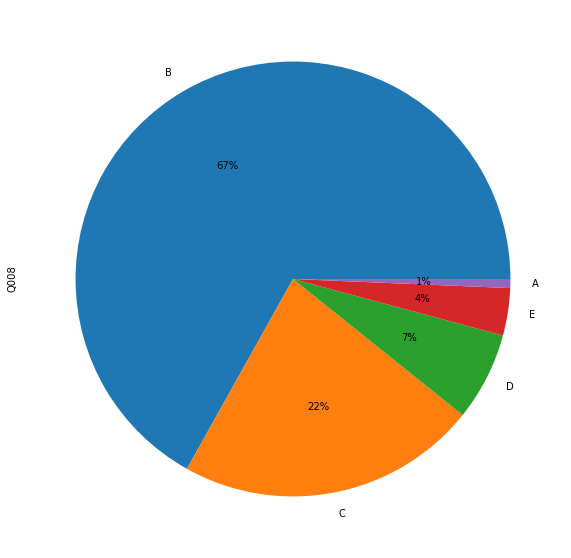

In [61]:
#db.groupby(['Q006']).sum().plot(kind='pie', subplots=True, autopct='%1.0f%%')
db["Q008"].value_counts().plot.pie(autopct='%1.0f%%', figsize=(10, 10))

In [62]:
# Q008 (Nao; Um; Dois; Três; Quatro ou mais)
# A - Nao; B - Um; C - Dois; D - Três; E - Quatro ou mais
db.Q008.replace(['A', 'B', 'C', 'D', 'E'], 
                ['Nao', 'Um', 'Dois', 'Três ou mais', 'Três ou mais'], inplace=True)
db.rename(columns = {'Q008':'Q08_Banheiro/Residencia'}, inplace = True)

<AxesSubplot:ylabel='Q08_Banheiro/Residencia'>

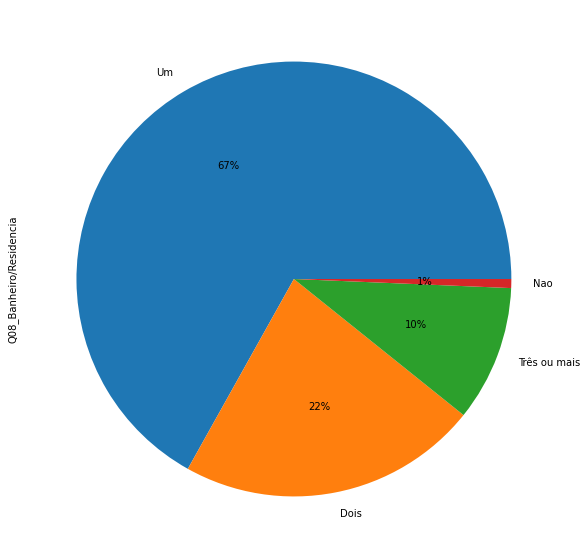

In [63]:
db["Q08_Banheiro/Residencia"].value_counts().plot.pie(autopct='%1.0f%%', figsize=(10, 10))

-

<AxesSubplot:ylabel='Q009'>

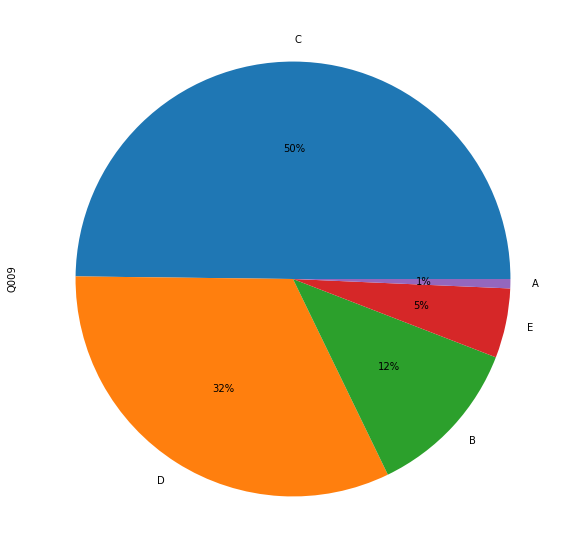

In [64]:
db["Q009"].value_counts().plot.pie(autopct='%1.0f%%', figsize=(10, 10))

In [65]:
# Q009 (Nao; Um; Dois; Três; Quatro ou mais)
# A - Nao; B - Um; C - Dois; D - Três; E - Quatro ou mais
db.Q009.replace(['A', 'B', 'C', 'D', 'E'], 
                ['Nao', 'Um', 'Dois', 'Três', 'Quatro ou mais'], inplace=True)
db.rename(columns = {'Q009':'Q09_Quartos/Residencia'}, inplace = True)

<AxesSubplot:ylabel='Q09_Quartos/Residencia'>

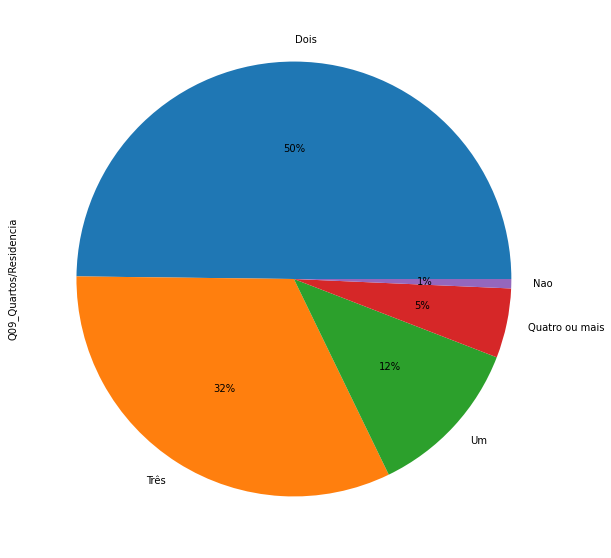

In [66]:
db["Q09_Quartos/Residencia"].value_counts().plot.pie(autopct='%1.0f%%', figsize=(10, 10))

-

<AxesSubplot:ylabel='Q010'>

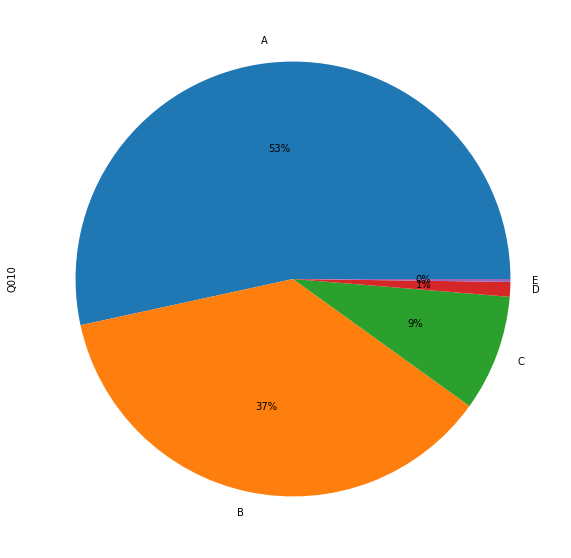

In [67]:
db["Q010"].value_counts().plot.pie(autopct='%1.0f%%', figsize=(10, 10))

In [68]:
# Q010 (Nao; Um; Dois; Três; Quatro ou mais)
# A - Nao; B - Um; C - Dois; D - Três; E - Quatro ou mais
db.Q010.replace(['A', 'B', 'C', 'D', 'E'], 
                ['Nao', 'Um', 'Dois ou mais', 'Dois ou mais', 'Dois ou mais'], inplace=True)
db.rename(columns = {'Q010':'Q10_Carro/Residencia'}, inplace = True)

<AxesSubplot:ylabel='Q10_Carro/Residencia'>

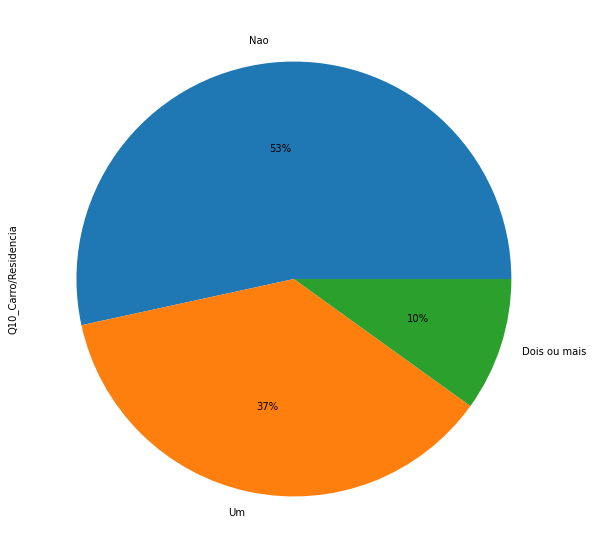

In [69]:
db["Q10_Carro/Residencia"].value_counts().plot.pie(autopct='%1.0f%%', figsize=(10, 10))

-

<AxesSubplot:ylabel='Q011'>

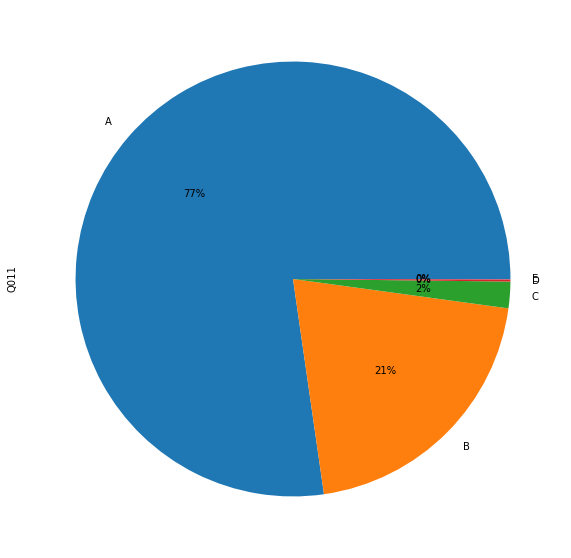

In [70]:
db["Q011"].value_counts().plot.pie(autopct='%1.0f%%', figsize=(10, 10))

In [71]:
# Q011 (Nao; Um; Dois; Três; Quatro ou mais)
# A - Nao; B - Um; C - Dois; D - Três; E - Quatro ou mais
db.Q011.replace(['A', 'B', 'C', 'D', 'E'], 
                ['Nao', 'Uma', 'Duas ou mais', 'Duas ou mais', 'Duas ou mais'], inplace=True)
db.rename(columns = {'Q011':'Q11_Moto/Residencia'}, inplace = True)

<AxesSubplot:ylabel='Q11_Moto/Residencia'>

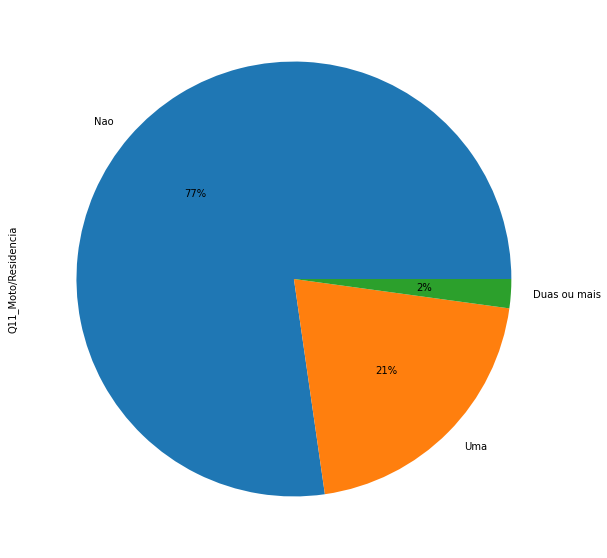

In [72]:
db["Q11_Moto/Residencia"].value_counts().plot.pie(autopct='%1.0f%%', figsize=(10, 10))

-

<AxesSubplot:ylabel='Q012'>

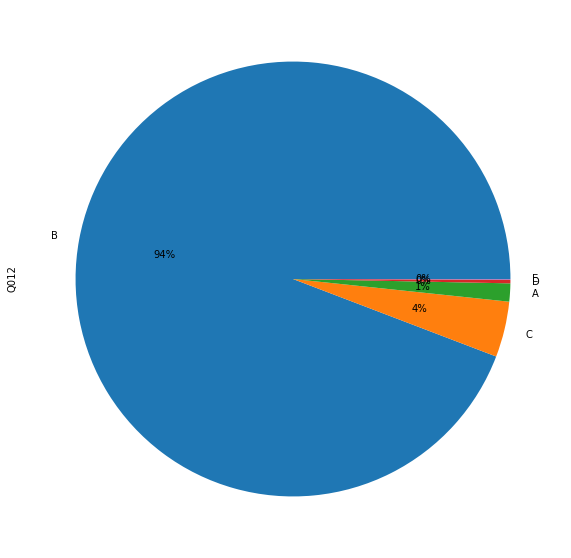

In [73]:
db["Q012"].value_counts().plot.pie(autopct='%1.0f%%', figsize=(10, 10))

In [74]:
# Q012 (Nao; Um; Dois; Três; Quatro ou mais)
# A - Nao; B - Um; C - Dois; D - Três; E - Quatro ou mais
db.Q012.replace(['A', 'B', 'C', 'D', 'E'], 
                ['Nao', 'Uma', 'Duas ou mais', 'Duas ou mais', 'Duas ou mais'], inplace=True)
db.rename(columns = {'Q012':'Q12_Geladeira/Residencia'}, inplace = True)

<AxesSubplot:ylabel='Q12_Geladeira/Residencia'>

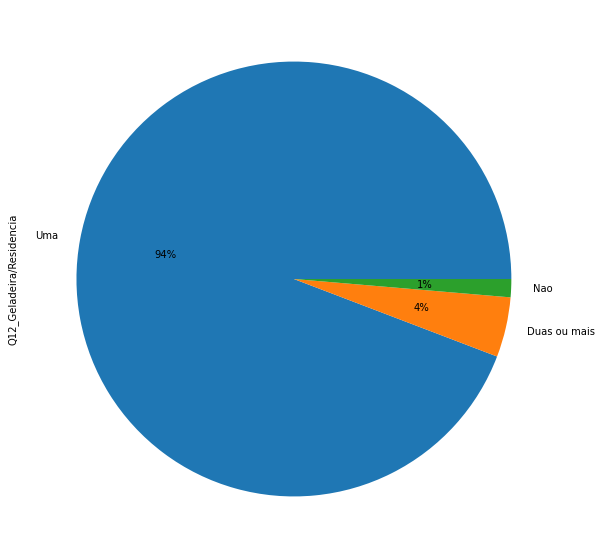

In [75]:
db["Q12_Geladeira/Residencia"].value_counts().plot.pie(autopct='%1.0f%%', figsize=(10, 10))

-

<AxesSubplot:ylabel='Q013'>

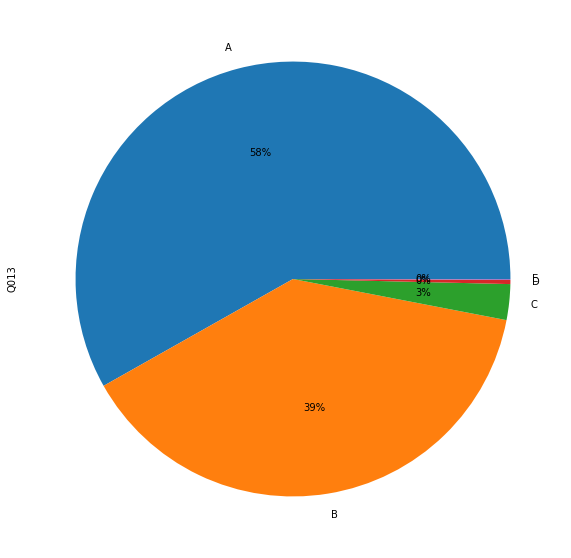

In [76]:
db["Q013"].value_counts().plot.pie(autopct='%1.0f%%', figsize=(10, 10))

In [77]:
# Q013 (Nao; Um; Dois; Três; Quatro ou mais)
# A - Nao; B - Um; C - Dois; D - Três; E - Quatro ou mais
db.Q013.replace(['A', 'B', 'C', 'D', 'E'], 
                ['Nao', 'Um', 'Dois ou mais', 'Dois ou mais', 'Dois ou mais'], inplace=True)
db.rename(columns = {'Q013':'Q13_Freezer/Residencia'}, inplace = True)

<AxesSubplot:ylabel='Q13_Freezer/Residencia'>

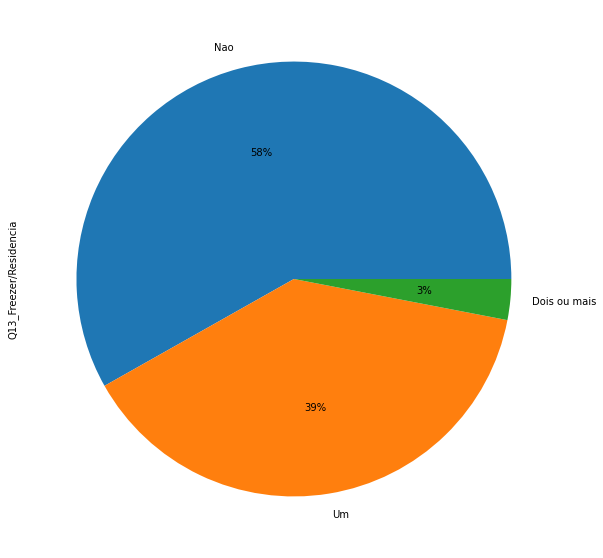

In [78]:
db["Q13_Freezer/Residencia"].value_counts().plot.pie(autopct='%1.0f%%', figsize=(10, 10))

-

<AxesSubplot:ylabel='Q014'>

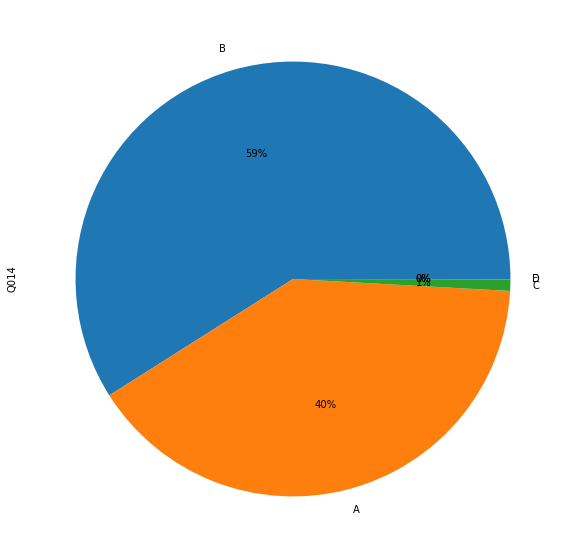

In [79]:
db["Q014"].value_counts().plot.pie(autopct='%1.0f%%', figsize=(10, 10))

In [80]:
# Q014 (Nao; Um; Dois; Três; Quatro ou mais)
# A - Nao; B - Um; C - Dois; D - Três; E - Quatro ou mais
db.Q014.replace(['A', 'B', 'C', 'D', 'E'], 
                ['Nao', 'Uma', 'Duas ou mais', 'Duas ou mais', 'Duas ou mais'], inplace=True)
db.rename(columns = {'Q014':'Q14_Maq_Lavar_Roupa/Residencia'}, inplace = True)

<AxesSubplot:ylabel='Q14_Maq_Lavar_Roupa/Residencia'>

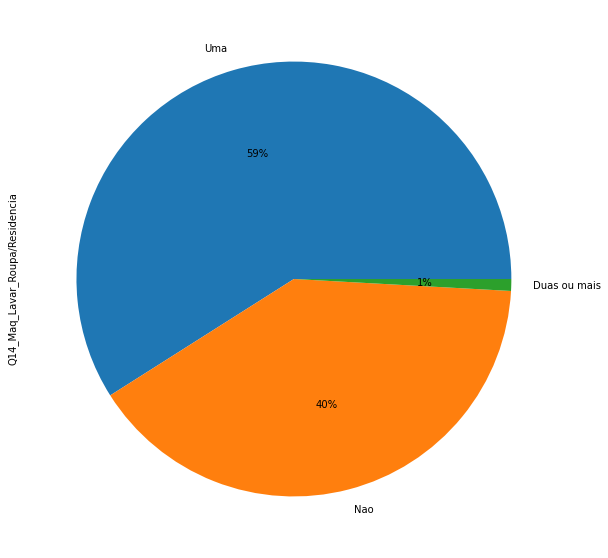

In [81]:
db["Q14_Maq_Lavar_Roupa/Residencia"].value_counts().plot.pie(autopct='%1.0f%%', figsize=(10, 10))

-

<AxesSubplot:ylabel='Q015'>

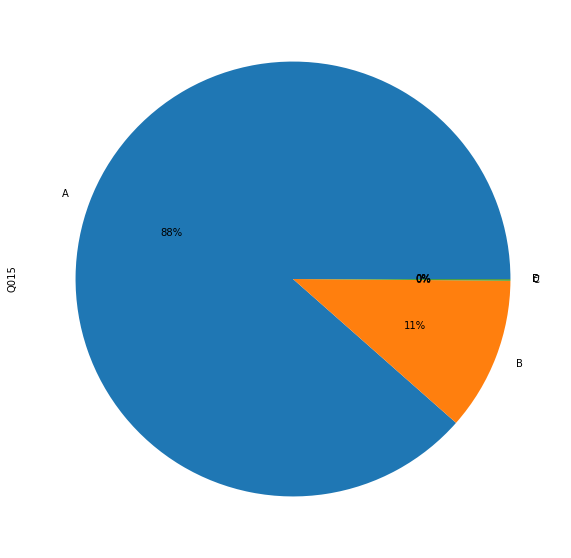

In [82]:
db["Q015"].value_counts().plot.pie(autopct='%1.0f%%', figsize=(10, 10))

In [83]:
# Q015 (Nao; Um; Dois; Três; Quatro ou mais)
# A - Nao; B - Um; C - Dois; D - Três; E - Quatro ou mais
db.Q015.replace(['A', 'B', 'C', 'D', 'E'], 
                ['Nao', 'Uma', 'Duas ou mais', 'Duas ou mais', 'Duas ou mais'], inplace=True)
db.rename(columns = {'Q015':'Q15_Maq_Secar_Roupa/Residencia'}, inplace = True)

<AxesSubplot:ylabel='Q15_Maq_Secar_Roupa/Residencia'>

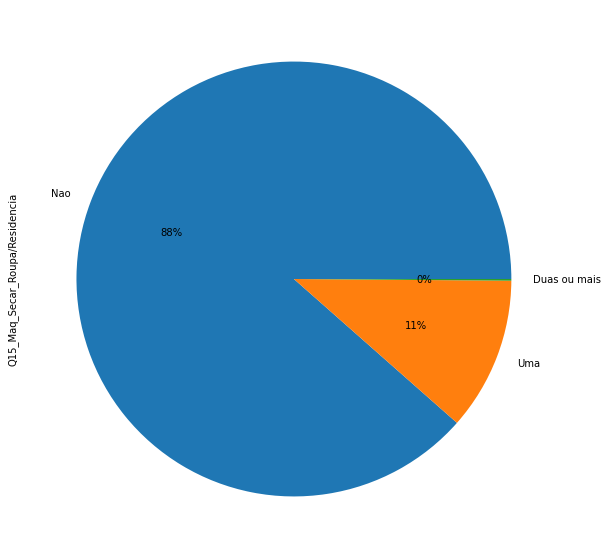

In [84]:
db["Q15_Maq_Secar_Roupa/Residencia"].value_counts().plot.pie(autopct='%1.0f%%', figsize=(10, 10))

-

<AxesSubplot:ylabel='Q016'>

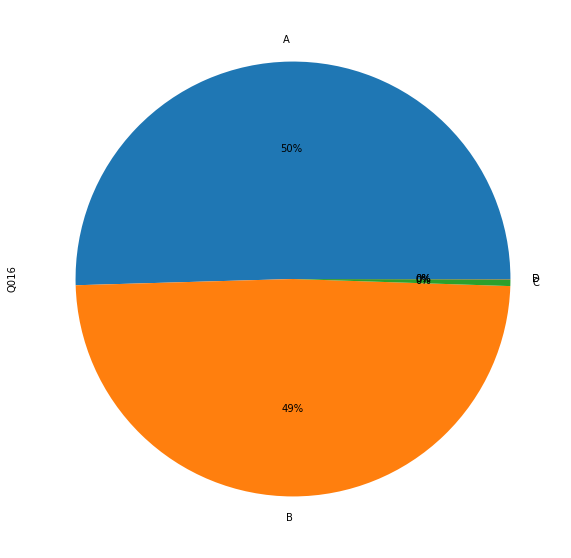

In [85]:
db["Q016"].value_counts().plot.pie(autopct='%1.0f%%', figsize=(10, 10))

In [86]:
# Q016 (Nao; Um; Dois; Três; Quatro ou mais)
# A - Nao; B - Um; C - Dois; D - Três; E - Quatro ou mais
db.Q016.replace(['A', 'B', 'C', 'D', 'E'], 
                ['Nao', 'Um', 'Dois ou mais', 'Dois ou mais', 'Dois ou mais'], inplace=True)
db.rename(columns = {'Q016':'Q16_Micro-ondas/Residencia'}, inplace = True)

<AxesSubplot:ylabel='Q16_Micro-ondas/Residencia'>

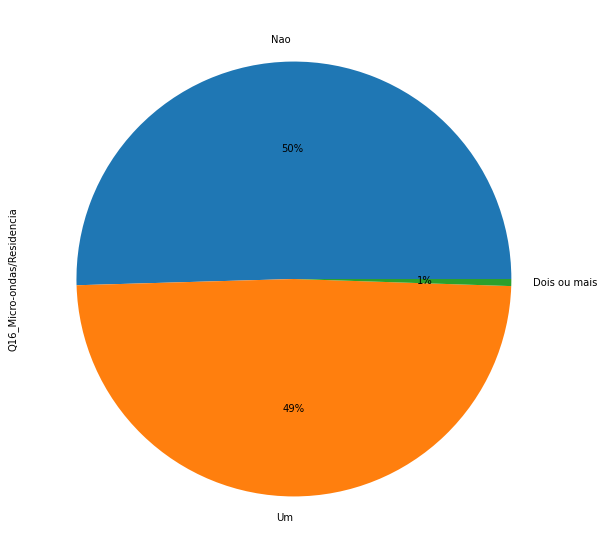

In [87]:
db["Q16_Micro-ondas/Residencia"].value_counts().plot.pie(autopct='%1.0f%%', figsize=(10, 10))

-

<AxesSubplot:ylabel='Q017'>

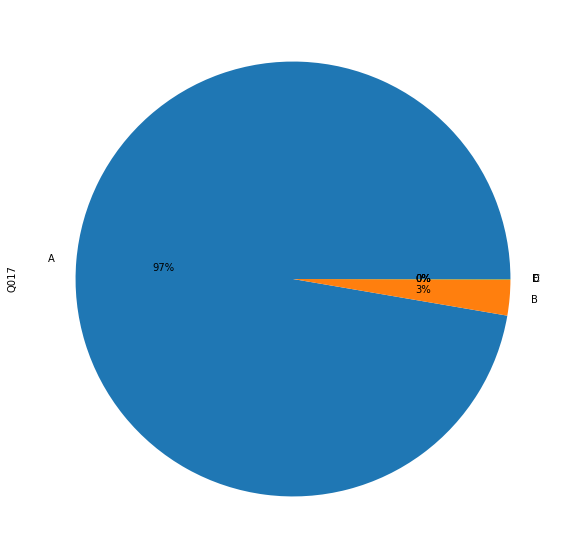

In [88]:
db["Q017"].value_counts().plot.pie(autopct='%1.0f%%', figsize=(10, 10))

In [89]:
# Q017 (Nao; Um; Dois; Três; Quatro ou mais)
# A - Nao; B - Um; C - Dois; D - Três; E - Quatro ou mais
db.Q017.replace(['A', 'B', 'C', 'D', 'E'], 
                ['Nao', 'Sim', 'Sim', 'Sim', 'Sim'], inplace=True)
db.rename(columns = {'Q017':'Q17_Maq_Lavar_Louca/Residencia'}, inplace = True)

<AxesSubplot:ylabel='Q17_Maq_Lavar_Louca/Residencia'>

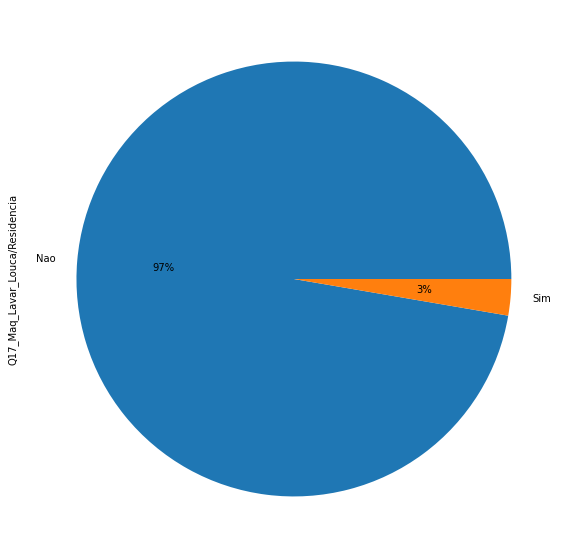

In [90]:
db["Q17_Maq_Lavar_Louca/Residencia"].value_counts().plot.pie(autopct='%1.0f%%', figsize=(10, 10))

-

<AxesSubplot:ylabel='Q018'>

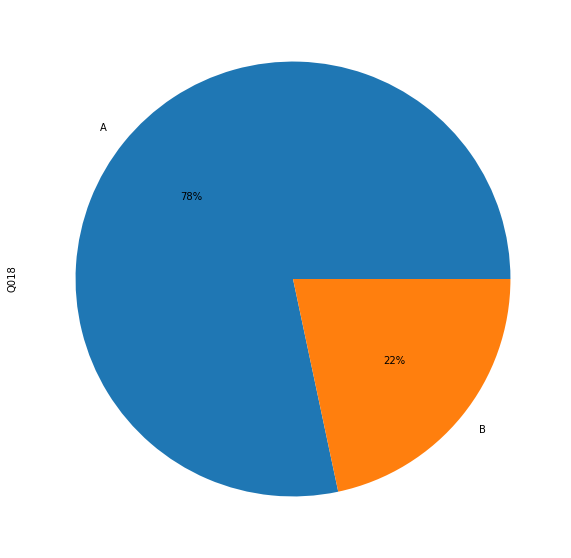

In [91]:
db["Q018"].value_counts().plot.pie(autopct='%1.0f%%', figsize=(10, 10))

In [92]:
# Q018 (Nao; Sim)
# A - Nao; B - Sim
db.Q018.replace(['A', 'B'], 
                ['Nao', 'Sim'], inplace=True)
db.rename(columns = {'Q018':'Q18_Aspirador/Residencia'}, inplace = True)

<AxesSubplot:ylabel='Q18_Aspirador/Residencia'>

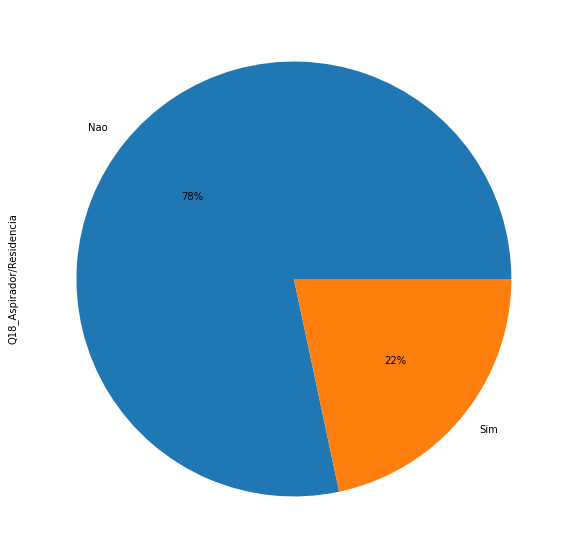

In [93]:
db["Q18_Aspirador/Residencia"].value_counts().plot.pie(autopct='%1.0f%%', figsize=(10, 10))

-

<AxesSubplot:ylabel='Q019'>

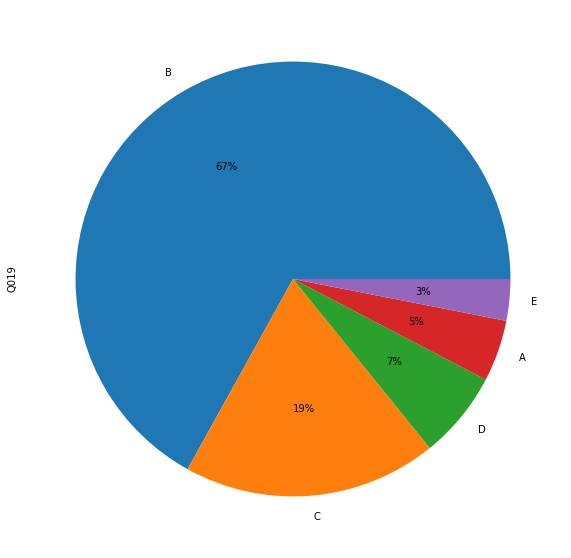

In [94]:
db["Q019"].value_counts().plot.pie(autopct='%1.0f%%', figsize=(10, 10))

In [95]:
# Q019 (Nao; Um; Dois; Três; Quatro ou mais)
# A - Nao; B - Um; C - Dois; D - Três; E - Quatro ou mais
db.Q019.replace(['A', 'B', 'C', 'D', 'E'], 
                ['Nao', 'Uma', 'Duas', 'Tres ou mais', 'Tres ou mais'], inplace=True)
db.rename(columns = {'Q019':'Q19_TV/Residencia'}, inplace = True)

<AxesSubplot:ylabel='Q19_TV/Residencia'>

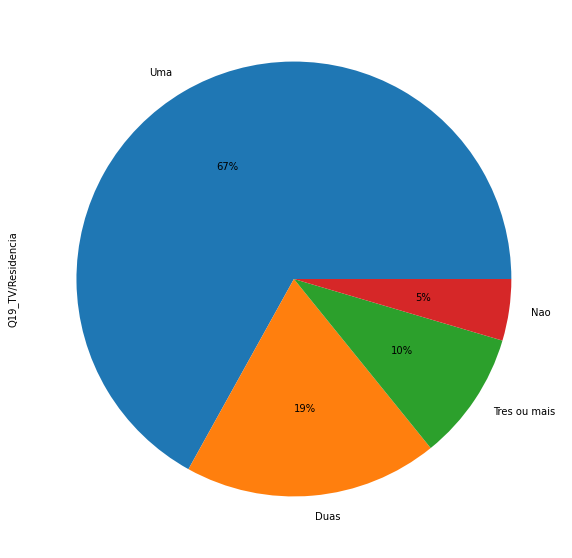

In [96]:
db["Q19_TV/Residencia"].value_counts().plot.pie(autopct='%1.0f%%', figsize=(10, 10))

-

<AxesSubplot:ylabel='Q020'>

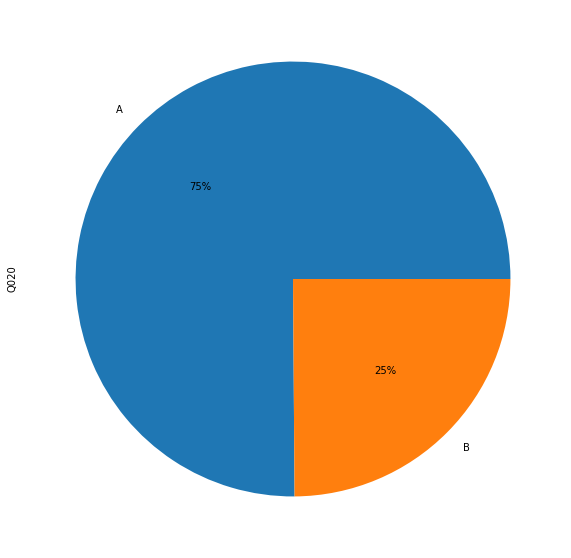

In [97]:
db["Q020"].value_counts().plot.pie(autopct='%1.0f%%', figsize=(10, 10))

In [98]:
# Q020 (Nao; Sim)
# A - Nao; B - Sim
db.Q020.replace(['A', 'B'], 
                ['Nao', 'Sim'], inplace=True)
db.rename(columns = {'Q020':'Q20_DVD/Residencia'}, inplace = True)

<AxesSubplot:ylabel='Q20_DVD/Residencia'>

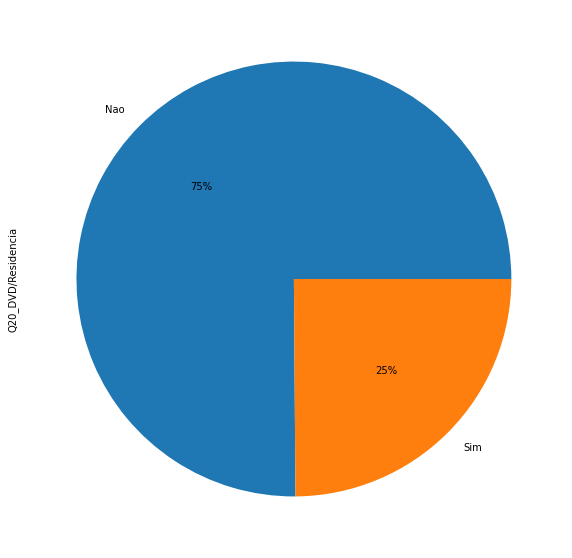

In [99]:
db["Q20_DVD/Residencia"].value_counts().plot.pie(autopct='%1.0f%%', figsize=(10, 10))

-

<AxesSubplot:ylabel='Q021'>

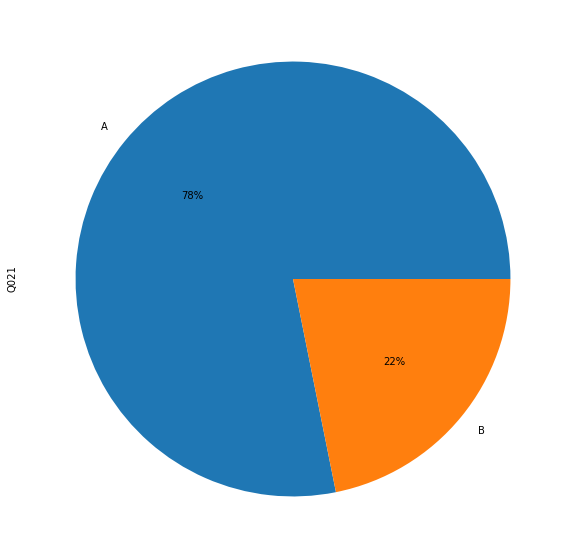

In [100]:
db["Q021"].value_counts().plot.pie(autopct='%1.0f%%', figsize=(10, 10))

In [101]:
# Q021 (Nao; Sim)
# A - Nao; B - Sim
db.Q021.replace(['A', 'B'], 
                ['Nao', 'Sim'], inplace=True)
db.rename(columns = {'Q021':'Q21_TV_Assinatura/Residencia'}, inplace = True)

<AxesSubplot:ylabel='Q21_TV_Assinatura/Residencia'>

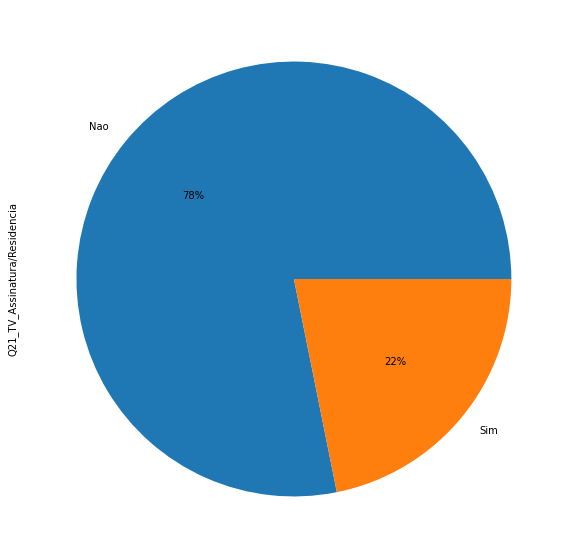

In [102]:
db["Q21_TV_Assinatura/Residencia"].value_counts().plot.pie(autopct='%1.0f%%', figsize=(10, 10))

-

<AxesSubplot:ylabel='Q022'>

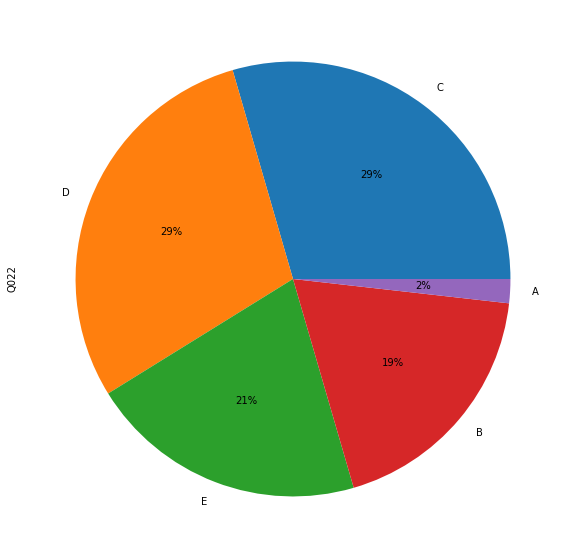

In [103]:
db["Q022"].value_counts().plot.pie(autopct='%1.0f%%', figsize=(10, 10))

In [104]:
# Q022 (Nao; Um; Dois; Três; Quatro ou mais)
# A - Nao; B - Um; C - Dois; D - Três; E - Quatro ou mais
db.Q022.replace(['A', 'B', 'C', 'D', 'E'], 
                ['Nao', 'Um', 'Dois', 'Três', 'Quatro ou mais'], inplace=True)

# Não
# Um
# Dois ou mais
# analisar caso de celulares
db.rename(columns = {'Q022':'Q22_Celular/Residencia'}, inplace = True)

<AxesSubplot:ylabel='Q22_Celular/Residencia'>

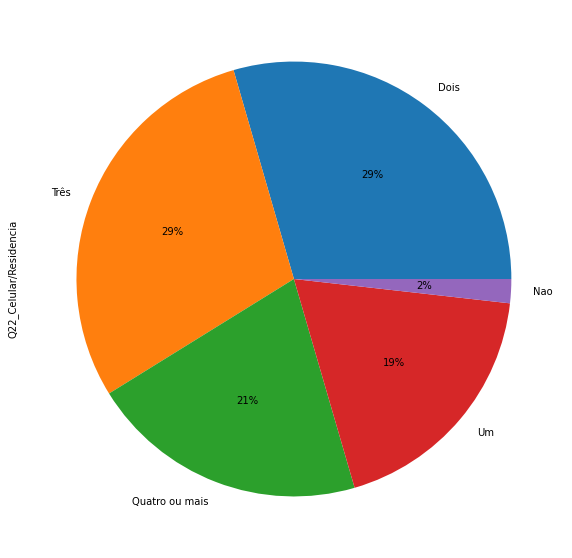

In [105]:
db["Q22_Celular/Residencia"].value_counts().plot.pie(autopct='%1.0f%%', figsize=(10, 10))

-

<AxesSubplot:ylabel='Q023'>

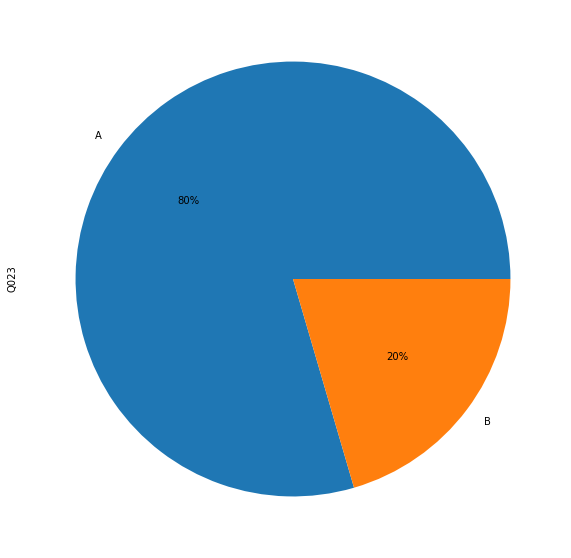

In [106]:
db["Q023"].value_counts().plot.pie(autopct='%1.0f%%', figsize=(10, 10))

In [107]:
# Q023 (Nao; Sim)
# A - Nao; B - Sim
db.Q023.replace(['A', 'B'], 
                ['Nao', 'Sim'], inplace=True)
db.rename(columns = {'Q023':'Q23_Telefone_Fixo/Residencia'}, inplace = True)

<AxesSubplot:ylabel='Q23_Telefone_Fixo/Residencia'>

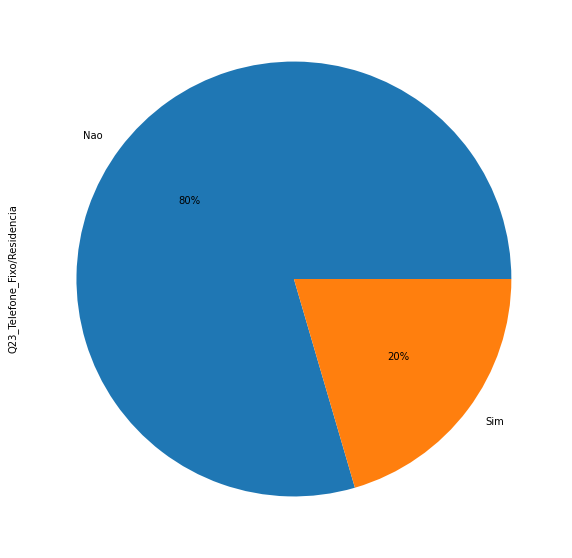

In [108]:
db["Q23_Telefone_Fixo/Residencia"].value_counts().plot.pie(autopct='%1.0f%%', figsize=(10, 10))

-

<AxesSubplot:ylabel='Q024'>

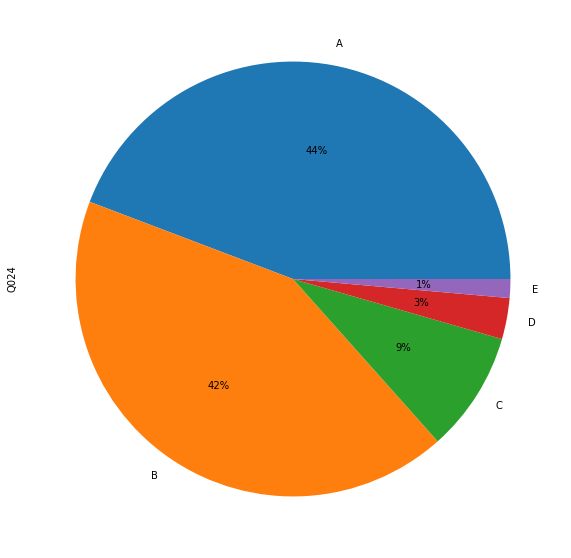

In [109]:
db["Q024"].value_counts().plot.pie(autopct='%1.0f%%', figsize=(10, 10))

In [110]:
# Q024 (Nao; Um; Dois; Três; Quatro ou mais)
# A - Nao; B - Um; C - Dois; D - Três; E - Quatro ou mais
db.Q024.replace(['A', 'B', 'C', 'D', 'E'], 
                ['Nao', 'Um', 'Dois ou mais', 'Dois ou mais', 'Dois ou mais'], inplace=True)

# Não
# Um
# Dois ou mais
db.rename(columns = {'Q024':'Q24_PC/Residencia'}, inplace = True)

<AxesSubplot:ylabel='Q24_PC/Residencia'>

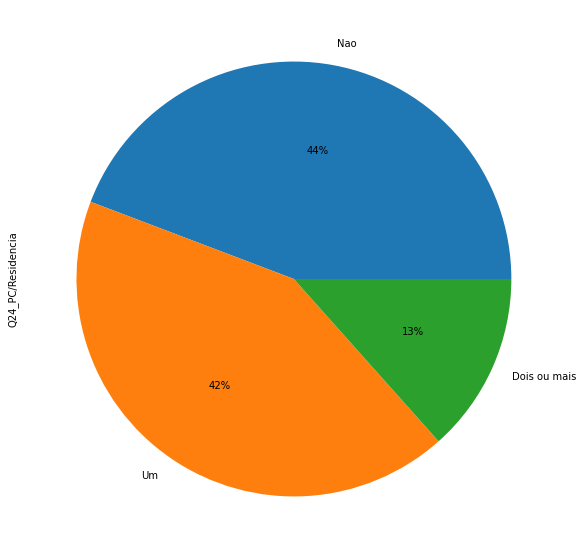

In [111]:
db["Q24_PC/Residencia"].value_counts().plot.pie(autopct='%1.0f%%', figsize=(10, 10))

-

<AxesSubplot:ylabel='Q025'>

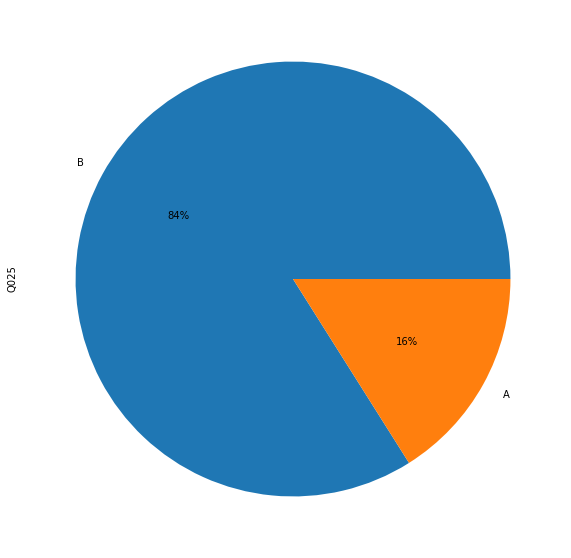

In [112]:
db["Q025"].value_counts().plot.pie(autopct='%1.0f%%', figsize=(10, 10))

In [113]:
# Q025 (Nao; Sim)
# A - Nao; B - Sim
db.Q025.replace(['A', 'B'], 
                ['Nao', 'Sim'], inplace=True)
db.rename(columns = {'Q025':'Q25_Acesso_Internet'}, inplace = True)

<AxesSubplot:ylabel='Q25_Acesso_Internet'>

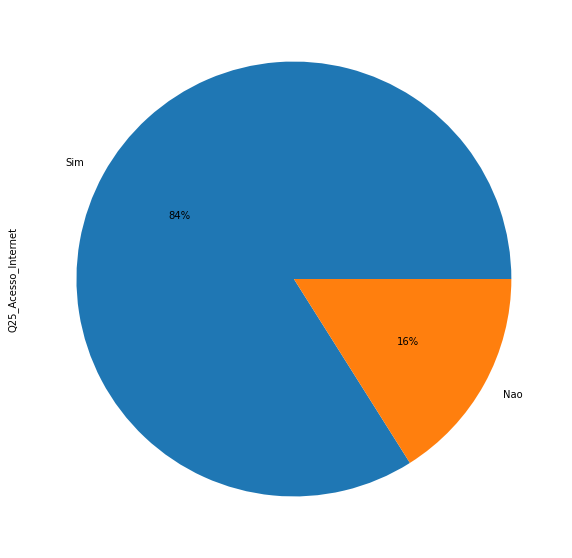

In [114]:
db["Q25_Acesso_Internet"].value_counts().plot.pie(autopct='%1.0f%%', figsize=(10, 10))

Binning Notas

In [115]:
# Criando média de notas
db['NOTA_MEDIA_GERAL'] = db[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].mean(axis=1)

In [116]:
db.describe().columns

Index(['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'NOTA_MEDIA_GERAL'],
      dtype='object')

In [ ]:
minValue = df.col1[df.col1!=0].min()
maxValue = df.col1[df.col2!=0].max()

In [ ]:
analiseExplNotas = pd.DataFrame(columns=['Atributo','Min','Max','Moda','Quant. Moda','Valores Ausentes','Valores Ausentes (%)'])

lenDB = len(db)
for coluna in db.describe().columns[1:]:
    linha = db[coluna].describe()
    
    unicos = float(linha[1])
    moda = linha[2]
    ausentes = int(lenDB-linha[0])
    inserirLinha = [coluna, # Atributo
                    db[coluna].dtypes, # Tipo 
                    unicos, # Quantidade de Valores Distintos
                    moda, # Moda
                    int(linha[3]), # Quantidade Moda - https://www.width.ai/pandas/count-specific-value-in-column-with-pandas
                    ausentes, # Valores ausentes
                    ausentes/lenDB # Valores ausentes (%)
                   ]
    analiseExplNotas.loc[len(analiseExplNotas)] = inserirLinha
analiseExplNotas

In [55]:
# Binning Notas https://www.geeksforgeeks.org/binning-in-data-mining/
pd.qcut(db['NU_NOTA_CN'], q=3).value_counts()

(-0.001, 445.3]    854478
(445.3, 526.4]     853954
(526.4, 854.8]     852872
Name: NU_NOTA_CN, dtype: int64

In [117]:
# Obter largura das faixas de cada atributo
n = 4 # 4 faixas

In [118]:
# Obter Largura de faixa pra cada nota
# ----- Prova Objetiva -----
#NU_NOTA_CN
CNmin = db.NU_NOTA_CN.min() #0 - 323.9
CNmax = db.NU_NOTA_CN.max() #854.8
wCN = (CNmax-CNmin)/n #284.93333333333334 ~ 285

#NU_NOTA_CH
CHmin = db.NU_NOTA_CH.min() #0
CHmax = db.NU_NOTA_CH.max() #862.6
wCH = (CHmax-CHmin)/n #287.53333333333336 ~ 288

#NU_NOTA_LC
LCmin = db.NU_NOTA_LC.min() #0
LCmax = db.NU_NOTA_LC.max() #801.1
wLC = (LCmax-LCmin)/n #267.03333333333336 ~ 267

#NU_NOTA_MT
MTmin = db.NU_NOTA_MT.min() #0
MTmax = db.NU_NOTA_MT.max() #975
wMT = (MTmax-MTmin)/n #325

#NOTA_MEDIA_GERAL
NMGmin = db.NOTA_MEDIA_GERAL.min()
NMGmax = db.NOTA_MEDIA_GERAL.max()
wNMG = (NMGmax-NMGmin)/n #286.1933333333333 ~ 286

# ----- Redação -----
#NU_NOTA_COMP1
C1min = db.NU_NOTA_COMP1.min() #0
C1max = db.NU_NOTA_COMP1.max() #200
wC1 = (C1max-C1min)/n #66.66666666666667 ~ 67

#NU_NOTA_COMP2
C2min = db.NU_NOTA_COMP2.min() #0
C2max = db.NU_NOTA_COMP2.max() #200
wC2 = (C2max-C2min)/n #66.66666666666667 ~ 67

#NU_NOTA_COMP3
C3min = db.NU_NOTA_COMP3.min() #0
C3max = db.NU_NOTA_COMP3.max() #200
wC3 = (C3max-C3min)/n #66.66666666666667 ~ 67

#NU_NOTA_COMP4
C4min = db.NU_NOTA_COMP4.min() #0
C4max = db.NU_NOTA_COMP4.max() #200
wC4 = (C4max-C4min)/n #66.66666666666667 ~ 67

#NU_NOTA_COMP5
C5min = db.NU_NOTA_COMP5.min() #0
C5max = db.NU_NOTA_COMP5.max() #200
wC5 = (C5max-C5min)/n #66.66666666666667 ~ 67

#NU_NOTA_REDACAO
CRmin = db.NU_NOTA_REDACAO.min() #0
CRmax = db.NU_NOTA_REDACAO.max() #1000
wCR = (CRmax-CRmin)/n #333.3333333333333 ~ 333

In [119]:
# Binning
# ----- Prova Objetiva -----
#NU_NOTA_CN
conditions = [
    (db['NU_NOTA_CN'] < wCN*2), #NOTA BAIXA
    (db['NU_NOTA_CN'] >= wCN*2) & (db['NU_NOTA_CN'] < wCN*3), #NOTA MEDIA
    (db['NU_NOTA_CN'] >= wCN*3) #NOTA ALTA
]

values = ['Nota Baixa', 
          'Nota Media',
          'Nota Alta']
db['NU_NOTA_CN'] = np.select(conditions, values)

#NU_NOTA_CH
conditions = [
    (db['NU_NOTA_CH'] < wCH*2), #NOTA BAIXA
    (db['NU_NOTA_CH'] >= wCH*2) & (db['NU_NOTA_CH'] < wCH*3), #NOTA MEDIA
    (db['NU_NOTA_CH'] >= wCH*3) #NOTA ALTA
]

values = ['Nota Baixa', 
          'Nota Media',
          'Nota Alta']
db['NU_NOTA_CH'] = np.select(conditions, values)

#NU_NOTA_LC
conditions = [
    (db['NU_NOTA_LC'] < wLC*2), #NOTA BAIXA
    (db['NU_NOTA_LC'] >= wLC*2) & (db['NU_NOTA_LC'] < wLC*3), #NOTA MEDIA
    (db['NU_NOTA_LC'] >= wLC*3) #NOTA ALTA
]

values = ['Nota Baixa', 
          'Nota Media',
          'Nota Alta']
db['NU_NOTA_LC'] = np.select(conditions, values)

#NU_NOTA_MT
conditions = [
    (db['NU_NOTA_MT'] < wMT*2), #NOTA BAIXA
    (db['NU_NOTA_MT'] >= wMT*2) & (db['NU_NOTA_MT'] < wMT*3), #NOTA MEDIA
    (db['NU_NOTA_MT'] >= wMT*3) #NOTA ALTA
]

values = ['Nota Baixa', 
          'Nota Media',
          'Nota Alta']
db['NU_NOTA_MT'] = np.select(conditions, values)

# NOTA_MEDIA_GERAL
conditions = [
    (db['NOTA_MEDIA_GERAL'] < wNMG*2), #NOTA BAIXA
    (db['NOTA_MEDIA_GERAL'] >= wNMG*2) & (db['NOTA_MEDIA_GERAL'] < wNMG*3), #NOTA MEDIA
    (db['NOTA_MEDIA_GERAL'] >= wNMG*3) #NOTA ALTA
]

values = ['Nota Baixa', 
          'Nota Media',
          'Nota Alta']
db['NOTA_MEDIA_GERAL'] = np.select(conditions, values)

# ----- Redação -----
#NU_NOTA_COMP1
conditions = [
    (db['NU_NOTA_COMP1'] < wC1*2), #NOTA BAIXA
    (db['NU_NOTA_COMP1'] >= wC1*2) & (db['NU_NOTA_COMP1'] < wC1*3), #NOTA MEDIA
    (db['NU_NOTA_COMP1'] >= wC1*3) #NOTA ALTA
]

values = ['Nota Baixa', 
          'Nota Media',
          'Nota Alta']
db['NU_NOTA_COMP1'] = np.select(conditions, values)

#NU_NOTA_COMP2
conditions = [
    (db['NU_NOTA_COMP2'] < wC2*2), #NOTA BAIXA
    (db['NU_NOTA_COMP2'] >= wC2*2) & (db['NU_NOTA_COMP2'] < wC2*3), #NOTA MEDIA
    (db['NU_NOTA_COMP2'] >= wC2*3) #NOTA ALTA
]

values = ['Nota Baixa', 
          'Nota Media',
          'Nota Alta']
db['NU_NOTA_COMP2'] = np.select(conditions, values)

#NU_NOTA_COMP3
conditions = [
    (db['NU_NOTA_COMP3'] < wC3*2), #NOTA BAIXA
    (db['NU_NOTA_COMP3'] >= wC3*2) & (db['NU_NOTA_COMP3'] < wC3*3), #NOTA MEDIA
    (db['NU_NOTA_COMP3'] >= wC3*3) #NOTA ALTA
]

values = ['Nota Baixa', 
          'Nota Media',
          'Nota Alta']
db['NU_NOTA_COMP3'] = np.select(conditions, values)

#NU_NOTA_COMP4
conditions = [
    (db['NU_NOTA_COMP4'] < wC4*2), #NOTA BAIXA
    (db['NU_NOTA_COMP4'] >= wC4*2) & (db['NU_NOTA_COMP4'] < wC4*3), #NOTA MEDIA
    (db['NU_NOTA_COMP4'] >= wC4*3) #NOTA ALTA
]

values = ['Nota Baixa', 
          'Nota Media',
          'Nota Alta']
db['NU_NOTA_COMP4'] = np.select(conditions, values)

#NU_NOTA_COMP5
conditions = [
    (db['NU_NOTA_COMP5'] < wC5*2), #NOTA BAIXA
    (db['NU_NOTA_COMP5'] >= wC5*2) & (db['NU_NOTA_COMP5'] < wC5*3), #NOTA MEDIA
    (db['NU_NOTA_COMP5'] >= wC5*3) #NOTA ALTA
]

values = ['Nota Baixa', 
          'Nota Media',
          'Nota Alta']
db['NU_NOTA_COMP5'] = np.select(conditions, values)

#NU_NOTA_REDACAO
conditions = [
    (db['NU_NOTA_REDACAO'] < wCR*2), #NOTA BAIXA
    (db['NU_NOTA_REDACAO'] >= wCR*2) & (db['NU_NOTA_REDACAO'] < wCR*3), #NOTA MEDIA
    (db['NU_NOTA_REDACAO'] >= wCR*3) #NOTA ALTA
]

values = ['Nota Baixa', 
          'Nota Media',
          'Nota Alta']
db['NU_NOTA_REDACAO'] = np.select(conditions, values)

<AxesSubplot:ylabel='NU_NOTA_CH'>

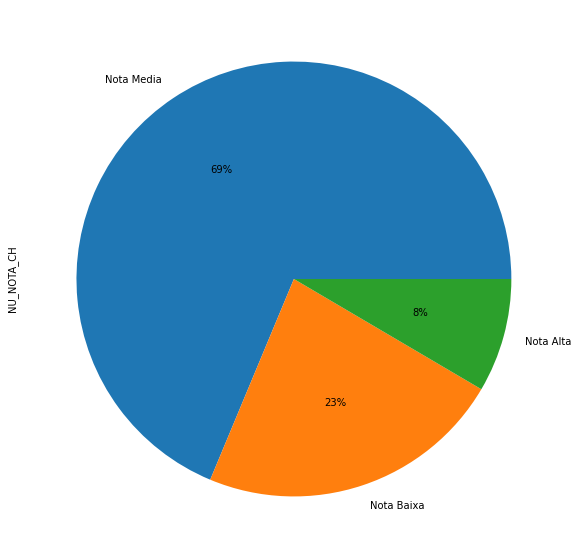

In [120]:
db["NU_NOTA_CH"].value_counts().plot.pie(autopct='%1.0f%%', figsize=(10, 10))

In [121]:
db.columns

Index(['TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_ESCOLA', 'REGIAO_PROVA', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TP_LINGUA', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2',
       'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO',
       'Q01_Educacao_Pai', 'Q02_Educacao_Mae', 'Q03_Grupo_Ocupacao_Pai',
       'Q04_Grupo_Ocupacao_Mae', 'Q05_Moradores/Residencia',
       'Q06_Renda_Familiar_Mensal', 'Q07_Empregado_Domestico',
       'Q08_Banheiro/Residencia', 'Q09_Quartos/Residencia',
       'Q10_Carro/Residencia', 'Q11_Moto/Residencia',
       'Q12_Geladeira/Residencia', 'Q13_Freezer/Residencia',
       'Q14_Maq_Lavar_Roupa/Residencia', 'Q15_Maq_Secar_Roupa/Residencia',
       'Q16_Micro-ondas/Residencia', 'Q17_Maq_Lavar_Louca/Residencia',
       'Q18_Aspirador/Residencia', 'Q19_TV/Residencia', 'Q20_DVD/Residencia',
       'Q21_TV_Assinatura/Residencia', 'Q22_Celular/Residencia',
       'Q23_Telefone_Fixo/Residencia', 'Q24_P

In [122]:
db.shape

(2561304, 44)

In [123]:
db.astype(str).apply(lambda x : x.name+'='+x)

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ESCOLA,REGIAO_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q01_Educacao_Pai,Q02_Educacao_Mae,Q03_Grupo_Ocupacao_Pai,Q04_Grupo_Ocupacao_Mae,Q05_Moradores/Residencia,Q06_Renda_Familiar_Mensal,Q07_Empregado_Domestico,Q08_Banheiro/Residencia,Q09_Quartos/Residencia,Q10_Carro/Residencia,Q11_Moto/Residencia,Q12_Geladeira/Residencia,Q13_Freezer/Residencia,Q14_Maq_Lavar_Roupa/Residencia,Q15_Maq_Secar_Roupa/Residencia,Q16_Micro-ondas/Residencia,Q17_Maq_Lavar_Louca/Residencia,Q18_Aspirador/Residencia,Q19_TV/Residencia,Q20_DVD/Residencia,Q21_TV_Assinatura/Residencia,Q22_Celular/Residencia,Q23_Telefone_Fixo/Residencia,Q24_PC/Residencia,Q25_Acesso_Internet,EM_CONCLUSAO,NOTA_MEDIA_GERAL
5,TP_FAIXA_ETARIA=Adolescente,TP_SEXO=F,TP_ESTADO_CIVIL=Solteiro(a),TP_COR_RACA=Parda,TP_ESCOLA=Nao Respondeu,REGIAO_PROVA=Sul,NU_NOTA_CN=Nota Media,NU_NOTA_CH=Nota Media,NU_NOTA_LC=Nota Media,NU_NOTA_MT=Nota Media,TP_LINGUA=Espanhol,NU_NOTA_COMP1=Nota Media,NU_NOTA_COMP2=Nota Media,NU_NOTA_COMP3=Nota Media,NU_NOTA_COMP4=Nota Media,NU_NOTA_COMP5=Nota Alta,NU_NOTA_REDACAO=Nota Media,Q01_Educacao_Pai=Fundamental incompleto,Q02_Educacao_Mae=Fundamental incompleto,Q03_Grupo_Ocupacao_Pai=Grupo 3,Q04_Grupo_Ocupacao_Mae=Grupo 2,Q05_Moradores/Residencia=5-10,Q06_Renda_Familiar_Mensal=Classe Baixa,Q07_Empregado_Domestico=Nao,Q08_Banheiro/Residencia=Um,Q09_Quartos/Residencia=Quatro ou mais,Q10_Carro/Residencia=Nao,Q11_Moto/Residencia=Nao,Q12_Geladeira/Residencia=Uma,Q13_Freezer/Residencia=Nao,Q14_Maq_Lavar_Roupa/Residencia=Nao,Q15_Maq_Secar_Roupa/Residencia=Nao,Q16_Micro-ondas/Residencia=Um,Q17_Maq_Lavar_Louca/Residencia=Nao,Q18_Aspirador/Residencia=Nao,Q19_TV/Residencia=Uma,Q20_DVD/Residencia=Sim,Q21_TV_Assinatura/Residencia=Nao,Q22_Celular/Residencia=Três,Q23_Telefone_Fixo/Residencia=Nao,Q24_PC/Residencia=Um,Q25_Acesso_Internet=Sim,EM_CONCLUSAO=Conclui o EM entre 2017 e 2019,NOTA_MEDIA_GERAL=Nota Media
8,TP_FAIXA_ETARIA=Jovem,TP_SEXO=F,TP_ESTADO_CIVIL=Casado(a)/Mora com companheiro(a),TP_COR_RACA=Parda,TP_ESCOLA=Nao Respondeu,REGIAO_PROVA=Nordeste,NU_NOTA_CN=Nota Media,NU_NOTA_CH=Nota Baixa,NU_NOTA_LC=Nota Media,NU_NOTA_MT=Nota Baixa,TP_LINGUA=Espanhol,NU_NOTA_COMP1=Nota Media,NU_NOTA_COMP2=Nota Media,NU_NOTA_COMP3=Nota Media,NU_NOTA_COMP4=Nota Media,NU_NOTA_COMP5=Nota Media,NU_NOTA_REDACAO=Nota Media,Q01_Educacao_Pai=Fundamental incompleto,Q02_Educacao_Mae=Fundamental incompleto,Q03_Grupo_Ocupacao_Pai=Grupo 3,Q04_Grupo_Ocupacao_Mae=Grupo 2,Q05_Moradores/Residencia=2,Q06_Renda_Familiar_Mensal=Classe Baixa,Q07_Empregado_Domestico=Nao,Q08_Banheiro/Residencia=Um,Q09_Quartos/Residencia=Dois,Q10_Carro/Residencia=Nao,Q11_Moto/Residencia=Nao,Q12_Geladeira/Residencia=Uma,Q13_Freezer/Residencia=Nao,Q14_Maq_Lavar_Roupa/Residencia=Uma,Q15_Maq_Secar_Roupa/Residencia=Nao,Q16_Micro-ondas/Residencia=Nao,Q17_Maq_Lavar_Louca/Residencia=Nao,Q18_Aspirador/Residencia=Nao,Q19_TV/Residencia=Uma,Q20_DVD/Residencia=Nao,Q21_TV_Assinatura/Residencia=Nao,Q22_Celular/Residencia=Dois,Q23_Telefone_Fixo/Residencia=Nao,Q24_PC/Residencia=Nao,Q25_Acesso_Internet=Nao,EM_CONCLUSAO=Conclui o EM entre 2017 e 2019,NOTA_MEDIA_GERAL=Nota Media
11,TP_FAIXA_ETARIA=Jovem,TP_SEXO=M,TP_ESTADO_CIVIL=Solteiro(a),TP_COR_RACA=Branca,TP_ESCOLA=Nao Respondeu,REGIAO_PROVA=Nordeste,NU_NOTA_CN=Nota Media,NU_NOTA_CH=Nota Media,NU_NOTA_LC=Nota Alta,NU_NOTA_MT=Nota Media,TP_LINGUA=Ingles,NU_NOTA_COMP1=Nota Media,NU_NOTA_COMP2=Nota Media,NU_NOTA_COMP3=Nota Media,NU_NOTA_COMP4=Nota Media,NU_NOTA_COMP5=Nota Media,NU_NOTA_REDACAO=Nota Media,Q01_Educacao_Pai=Fundamental incompleto,Q02_Educacao_Mae=Fundamental incompleto,Q03_Grupo_Ocupacao_Pai=Grupo 3,Q04_Grupo_Ocupacao_Mae=Grupo 2,Q05_Moradores/Residencia=5-10,Q06_Renda_Familiar_Mensal=Classe Baixa,Q07_Empregado_Domestico=Nao,Q08_Banheiro/Residencia=Um,Q09_Quartos/Residencia=Dois,Q10_Carro/Residencia=Nao,Q11_Moto/Residencia=

In [124]:
for col in db.columns:
    db.loc[:,col] = '{}='.format(col) + db[col].astype(str)

In [125]:
db.head()

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ESCOLA,REGIAO_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q01_Educacao_Pai,Q02_Educacao_Mae,Q03_Grupo_Ocupacao_Pai,Q04_Grupo_Ocupacao_Mae,Q05_Moradores/Residencia,Q06_Renda_Familiar_Mensal,Q07_Empregado_Domestico,Q08_Banheiro/Residencia,Q09_Quartos/Residencia,Q10_Carro/Residencia,Q11_Moto/Residencia,Q12_Geladeira/Residencia,Q13_Freezer/Residencia,Q14_Maq_Lavar_Roupa/Residencia,Q15_Maq_Secar_Roupa/Residencia,Q16_Micro-ondas/Residencia,Q17_Maq_Lavar_Louca/Residencia,Q18_Aspirador/Residencia,Q19_TV/Residencia,Q20_DVD/Residencia,Q21_TV_Assinatura/Residencia,Q22_Celular/Residencia,Q23_Telefone_Fixo/Residencia,Q24_PC/Residencia,Q25_Acesso_Internet,EM_CONCLUSAO,NOTA_MEDIA_GERAL
5,TP_FAIXA_ETARIA=Adolescente,TP_SEXO=F,TP_ESTADO_CIVIL=Solteiro(a),TP_COR_RACA=Parda,TP_ESCOLA=Nao Respondeu,REGIAO_PROVA=Sul,NU_NOTA_CN=Nota Media,NU_NOTA_CH=Nota Media,NU_NOTA_LC=Nota Media,NU_NOTA_MT=Nota Media,TP_LINGUA=Espanhol,NU_NOTA_COMP1=Nota Media,NU_NOTA_COMP2=Nota Media,NU_NOTA_COMP3=Nota Media,NU_NOTA_COMP4=Nota Media,NU_NOTA_COMP5=Nota Alta,NU_NOTA_REDACAO=Nota Media,Q01_Educacao_Pai=Fundamental incompleto,Q02_Educacao_Mae=Fundamental incompleto,Q03_Grupo_Ocupacao_Pai=Grupo 3,Q04_Grupo_Ocupacao_Mae=Grupo 2,Q05_Moradores/Residencia=5-10,Q06_Renda_Familiar_Mensal=Classe Baixa,Q07_Empregado_Domestico=Nao,Q08_Banheiro/Residencia=Um,Q09_Quartos/Residencia=Quatro ou mais,Q10_Carro/Residencia=Nao,Q11_Moto/Residencia=Nao,Q12_Geladeira/Residencia=Uma,Q13_Freezer/Residencia=Nao,Q14_Maq_Lavar_Roupa/Residencia=Nao,Q15_Maq_Secar_Roupa/Residencia=Nao,Q16_Micro-ondas/Residencia=Um,Q17_Maq_Lavar_Louca/Residencia=Nao,Q18_Aspirador/Residencia=Nao,Q19_TV/Residencia=Uma,Q20_DVD/Residencia=Sim,Q21_TV_Assinatura/Residencia=Nao,Q22_Celular/Residencia=Três,Q23_Telefone_Fixo/Residencia=Nao,Q24_PC/Residencia=Um,Q25_Acesso_Internet=Sim,EM_CONCLUSAO=Conclui o EM entre 2017 e 2019,NOTA_MEDIA_GERAL=Nota Media
8,TP_FAIXA_ETARIA=Jovem,TP_SEXO=F,TP_ESTADO_CIVIL=Casado(a)/Mora com companheiro(a),TP_COR_RACA=Parda,TP_ESCOLA=Nao Respondeu,REGIAO_PROVA=Nordeste,NU_NOTA_CN=Nota Media,NU_NOTA_CH=Nota Baixa,NU_NOTA_LC=Nota Media,NU_NOTA_MT=Nota Baixa,TP_LINGUA=Espanhol,NU_NOTA_COMP1=Nota Media,NU_NOTA_COMP2=Nota Media,NU_NOTA_COMP3=Nota Media,NU_NOTA_COMP4=Nota Media,NU_NOTA_COMP5=Nota Media,NU_NOTA_REDACAO=Nota Media,Q01_Educacao_Pai=Fundamental incompleto,Q02_Educacao_Mae=Fundamental incompleto,Q03_Grupo_Ocupacao_Pai=Grupo 3,Q04_Grupo_Ocupacao_Mae=Grupo 2,Q05_Moradores/Residencia=2,Q06_Renda_Familiar_Mensal=Classe Baixa,Q07_Empregado_Domestico=Nao,Q08_Banheiro/Residencia=Um,Q09_Quartos/Residencia=Dois,Q10_Carro/Residencia=Nao,Q11_Moto/Residencia=Nao,Q12_Geladeira/Residencia=Uma,Q13_Freezer/Residencia=Nao,Q14_Maq_Lavar_Roupa/Residencia=Uma,Q15_Maq_Secar_Roupa/Residencia=Nao,Q16_Micro-ondas/Residencia=Nao,Q17_Maq_Lavar_Louca/Residencia=Nao,Q18_Aspirador/Residencia=Nao,Q19_TV/Residencia=Uma,Q20_DVD/Residencia=Nao,Q21_TV_Assinatura/Residencia=Nao,Q22_Celular/Residencia=Dois,Q23_Telefone_Fixo/Residencia=Nao,Q24_PC/Residencia=Nao,Q25_Acesso_Internet=Nao,EM_CONCLUSAO=Conclui o EM entre 2017 e 2019,NOTA_MEDIA_GERAL=Nota Media
11,TP_FAIXA_ETARIA=Jovem,TP_SEXO=M,TP_ESTADO_CIVIL=Solteiro(a),TP_COR_RACA=Branca,TP_ESCOLA=Nao Respondeu,REGIAO_PROVA=Nordeste,NU_NOTA_CN=Nota Media,NU_NOTA_CH=Nota Media,NU_NOTA_LC=Nota Alta,NU_NOTA_MT=Nota Media,TP_LINGUA=Ingles,NU_NOTA_COMP1=Nota Media,NU_NOTA_COMP2=Nota Media,NU_NOTA_COMP3=Nota Media,NU_NOTA_COMP4=Nota Media,NU_NOTA_COMP5=Nota Media,NU_NOTA_REDACAO=Nota Media,Q01_Educacao_Pai=Fundamental incompleto,Q02_Educacao_Mae=Fundamental incompleto,Q03_Grupo_Ocupacao_Pai=Grupo 3,Q04_Grupo_Ocupacao_Mae=Grupo 2,Q05_Moradores/Residencia=5-10,Q06_Renda_Familiar_Mensal=Classe Baixa,Q07_Empregado_Domestico=Nao,Q08_Banheiro/Residencia=Um,Q09_Quartos/Residencia=Dois,Q10_Carro/Residencia=Nao,Q11_Moto/Residencia=

In [126]:
db.to_csv("enem2020_v8.csv", sep=';', header=False, index=False, encoding='utf-8')